# Method of Fire issue



## 1.Description

## 1.1 Selected Method:

Selected method :
- Normalized hotspot index
   - NHI= (swir2-swir1)/(swir2+swir1)
- Bands filter:
   - Band R,G,B for filtering the  soil or urban areas, smoke and cloud.

## 1.2 Unselected Method:

- SWIR2>SWIR1 & SWIR2>RED Normolized
  - 51/1404
- SWIR2>SWIR1 & SWIR2>RED Non-Normalized
  - 527/1404



## Confidence Method:
- NBR
- dNBR

https://un-spider.org/advisory-support/recommended-practices/recommended-practice-burn-severity/in-detail/normalized-burn-ratio




## 1.1 Sentinel bands:
Data source and bands description: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED

Option:
Level-2A orthorectified atmospherically corrected surface reflectance.

Tif file from sentinel2 source contains 23 bands:
- For using bands to find out the firs issue, we need SWIR 1, SWIR 2,  NIR, Red
-  B8 NIR, B11 SWIR 1 , B12 SWIR2, B4 Red. Band 11 at 1.590 - 1.610 microns and Band 12 at 2.100 - 2.280 microns. Band 11 at 1.590 - 1.610 microns and Band 12 at 2.100 - 2.280 microns

## 1.2  Bands
Short Wave Infrared(SWR) and Near-Infrared(NIR)
Detection Technique:

- Hotspot Detection: The SWIR bands can identify hot spots where the surface temperature is significantly higher than its surroundings. This can indicate active fires.
- Burn Scar Mapping: After a fire, the area will have altered reflectance characteristics in the SWIR range, which can help in mapping the extent of burn scars.
- NIR wavelength  0.7 to 1.4 microns. Healthy vegetation strongly reflects NIR light, burned areas and water absorb NIR, resulting in lower reflectance values.
- Surface reflectance values are scaled between 1 and 10000, Acturally, I find
- Resolution 20m
- Forest fires can reach temperatures of 800K on average. Minimum fire size of B12 bands at 800k is 10m^2   
Source:[ Sentinel-2 MSI data for active fire detection in major fire-prone biomes: A multi-criteria approach](https://www.sciencedirect.com/science/article/pii/S0303243421000544)

## 1.3 Fire , burning detection methods
### Two step
- 3 bands [swir2 swir1 red] to find the high temperature points.
- NBR to compared the difference and set the confidence

### 1.3.1 Threshold Method by using certain bands
- SWIR2 SWIR1 Red as the bands, define the threshold to filter the data
- Normalizing the data of the each band, Glob max and min, file max and min.
 - Version2, The image size is very small and there is not much noise, so in order to detect more high-temperature points, we decided to abandon using threshold for noise reduction.
   - swir2>swir1
   - swir2>red
  - Version1
   - swir2 >swir1+threshold,
   - swir2>red+threshold,
   - swir2>dynamic_threshold

### 1.3.2 Burned Detection
NBR-RAW (Normalized Burn Ratio)


NBR=(NIR-SWIR2)/(NIR+SWIR2)


BAI= 1/((0.1 -RED)^2 + (0.06 - NIR)^2)
[Landscape indices BAI](https://pro.arcgis.com/en/pro-app/latest/help/data/imagery/indices-gallery.htm)

- Healthy vegetation: Strongly reflects NIR, not SWIR
- Fire trail and burned vegetation/soil reflect strongly in SWIR
- NBR range -1 to 1, high NBR value indicates healthy vegetation. A low value indicates bare ground and recently burn. None-burn usually have values close to zero

- Using threshold 0.2 to filter the NBR

[Work with the Difference Normalized Burn Index - Using Spectral Remote Sensing to Understand the Impacts of Fire on the Landscape](https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-modis/normalized-burn-index-dNBR/)

[NBR up42](https://docs.up42.com/help/spectral-indexes/nbr)

[Sentinel-hub NBR-RAW (Normalized Burn Ratio)](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/nbr/)

[Burned Area Visualization]( https://custom-scripts.sentinel-hub.com/sentinel-2/burned_area_ms/)

### 1.3.3 Other potential resource

SAHM_INDEX Values: (B12-B11)/ (B12+B11)

https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/active_fire_detection/

https://github.com/sentinel-hub/custom-scripts/blob/main/sentinel-2/active_fire_detection/script.js

[Normalized Burn Ratio Plus (NBR+): A New Index for Sentinel-2 Imagery](https://www.mdpi.com/2072-4292/14/7/1727)

## 2.Preparation and Compared the tif file




#### 2.1 Steps and code explanation
- load target tif file
- show the image of swir1 and swir2 red
- show the distritbuion of the swir1 and swir2
- compared the nbr of two time
- compare the distribution of nbr

### 2.2 Pre-setting
- Lib installation
- Setting parameters

In [2]:
# Install the missing lib

!pip install rasterio
# print the current time
import datetime
import os
import sys
print(datetime.datetime.now())
import rasterio
import matplotlib.pyplot as plt
import numpy as np


# load the image from Drive folder
from google.colab import drive
drive.mount('/content/drive')

print(datetime.datetime.now())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 19.4 MB/s eta 0:00:00
2024-06-25 13:41:49.516864
Mounted at /content/drive
2024-06-25 13:42:07.658437


### 2.3 Try samples

#### 2.3.1 Show bands

['750-20230820-sentinel.tif', '750-20230901-sentinel.tif', '750-20230910-sentinel.tif', '750-20230920-sentinel.tif', '750-20231001-sentinel.tif', '750-20231010-sentinel.tif', '750-20231020-sentinel.tif', '750-20231101-sentinel.tif', '750-20231110-sentinel.tif', '750-20231120-sentinel.tif', '750-20231201-sentinel.tif', '750-20231210-sentinel.tif', '750-20231220-sentinel.tif', '750-20240101-sentinel.tif', '750-20240110-sentinel.tif', '750-20240120-sentinel.tif', '750-20240201-sentinel.tif', '750-20240210-sentinel.tif', '750-20240220-sentinel.tif', '750-20240301-sentinel.tif', '750-20240310-sentinel.tif', '750-20240320-sentinel.tif', '750-20240401-sentinel.tif', '750-20240410-sentinel.tif', '750-20240420-sentinel.tif', '750-20230501-sentinel.tif', '750-20230510-sentinel.tif', '750-20230520-sentinel.tif', '750-20230601-sentinel.tif', '750-20230610-sentinel.tif', '750-20230620-sentinel.tif', '750-20230701-sentinel.tif', '750-20230710-sentinel.tif', '750-20230720-sentinel.tif', '750-20230801

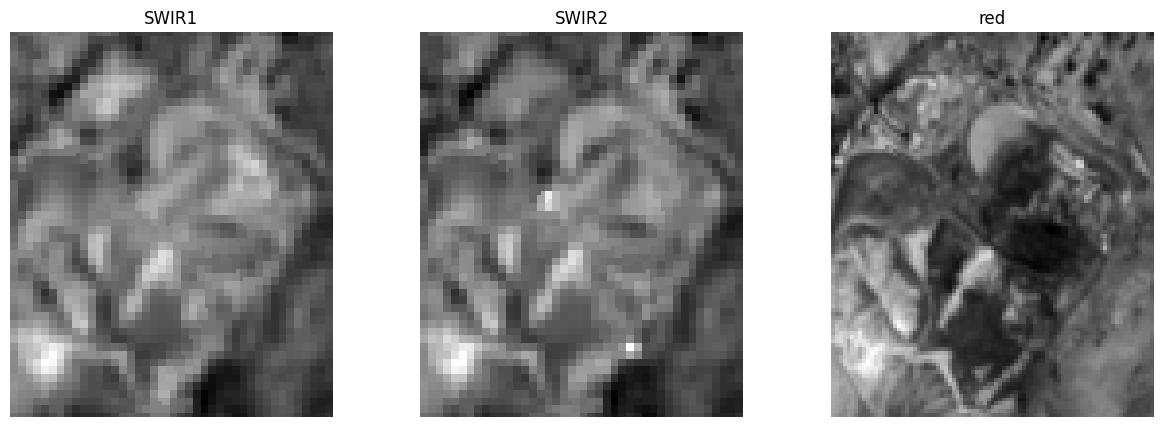

Value range of SWIR, Min: 1357.6666666666667  Max: 3249.3333333333335


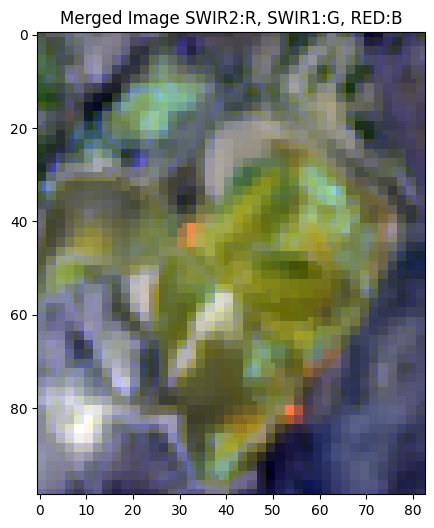

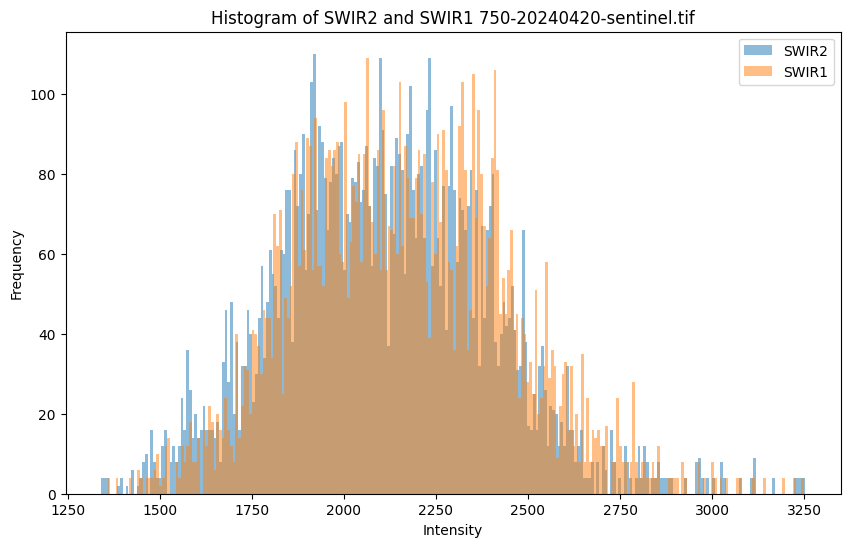

In [ ]:


# randamly chose one tif file in the 'sentinel_tif' folder and  show this tif image with R, G, B bands
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import os
import glob
import cv2
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.windows import Window


files=os.listdir('/content/drive/My Drive/sentinel_tif_mean')

# get the file names start with 750 and the time is newest one


# Filter the list to only include files that start with 750
filtered_files = [file for file in files if file.startswith('750')]

# Print the filtered list
print(filtered_files)

# chose one file
target_file_name="750-20240420-sentinel.tif"

# open the multiple-band geotiff image to save into target_t_data
target_t_data={}
target_t_data["file_name"]=target_file_name

rgb_image=None
bands_list=[]

with rasterio.open('/content/drive/My Drive/sentinel_tif_mean/'+target_file_name) as src:
    data=src.read()
    print("meta:",src.meta) # show the meta data, contains count of the bands
    print(src.descriptions) # show the bands

    # get the SWIR bands and show the bands value as image from the tif
    swir1=data[10]
    swir2=data[11]
    nir=data[7]
    red=data[3]
    green=data[2]
    blue=data[1]

    # show the bands as image
    target_t_data["swir1"]=swir1
    target_t_data["swir2"]=swir2
    target_t_data["red"]=red

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Creates 1 row, 3 columns of subplots

    show_list=[swir1,swir2,red]
    title_list=["SWIR1","SWIR2","red"]
    for i in range(3):
      axs[i].imshow(show_list[i], cmap='gray')
      axs[i].set_title(title_list[i])
      axs[i].axis('off')  # Optionally turn off axis

    # Show the plot of 3 bands
    plt.show()

    # show the data range of the red band
    print("Value range of SWIR, Min:" , np.min(swir1)," Max:", np.max(swir1))


    # normalize the swir1,swir2,red in 0 to 255 and merge them to show the image
    min_value = np.min(swir1)
    max_value = np.max(swir1)
    normalized_swir1 = (swir1 - min_value) / (max_value - min_value)
    # nomalized the data to range from 0 to 1

    min_value = np.min(swir2)
    max_value = np.max(swir2)
    normalized_swir2 = (swir2 - min_value) / (max_value - min_value)


    min_value = np.min(red)
    max_value = np.max(red)
    normalized_red = (red - min_value) / (max_value - min_value)


    min_value=np.min(nir)
    max_value=np.max(nir)
    normalized_nir=(nir-min_value)/(max_value-min_value)

    # make a new rgb colorful image by using the swir2 swir1 and red bands, and show them in image ,
    # show the three normalized image seperately
    bands_list= [normalized_swir2,normalized_swir1,normalized_red] # swir2 for red , swir1 for green , red for blue
    merged_image = np.dstack((normalized_swir2, normalized_swir1, normalized_red))
    rgb_image=merged_image # get the original rgb
    plt.figure(figsize=(10, 6))
    plt.title('Merged Image SWIR2:R, SWIR1:G, RED:B')
    plt.imshow(merged_image)
    plt.show()


    # show the distribution of the SWIR2 in diagram plot , compared with SWIR1 in the same diagram plot
    plt.figure(figsize=(10, 6))
    plt.hist(swir2.flatten(), bins=256, alpha=0.5, label='SWIR2')
    plt.hist(swir1.flatten(), bins=256, alpha=0.5, label='SWIR1')
    plt.title(f'Histogram of SWIR2 and SWIR1 {target_file_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


#### 2.3.2 Show one bands high value pixels

<class 'numpy.ndarray'>


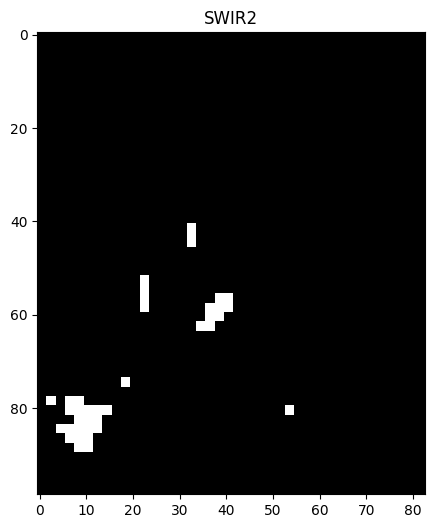

In [ ]:
# only show one bands high value , it still need cross filter to get the fire points

# value cope from the target_t_data to the new object filter_target_t_data
filter_target_t_data=target_t_data.copy()
filter_target_t_data["swir2"]=swir2>2800

print(type(filter_target_t_data["swir2"]))

# show the swir2 as a image
plt.figure(figsize=(10, 6))
plt.imshow(filter_target_t_data["swir2"], cmap='gray')
plt.title('SWIR2')
plt.show()


#### 2.3.3 Compared analysis

In [9]:
# Try NBR, compared the burn image
from datetime import datetime, timedelta
# open the target tif file,
target_data_nbr={}
#print(target_file_name)
pre_index=None
post_index=None
image_path="/content/drive/My Drive/sentinel_tif_mean/"
def show_nbr(filename,path=image_path):
    with rasterio.open(path+filename) as src:
        data=src.read()
        target_data_nbr["swir1"]=data[10]
        target_data_nbr["swir2"]=data[11]
        target_data_nbr["red"]=data[3]
        target_data_nbr["nir"]=data[7]
        target_data_nbr["green"]=data[2]
        target_data_nbr["blue"]=data[1]
    nbr_index=(target_data_nbr["nir"]-target_data_nbr["swir2"])/(target_data_nbr["swir2"]+target_data_nbr["nir"])
    # show the original image
    n_b1,n_b2,n_b3,n_b4=normalize_image_file(target_data_nbr["red"],target_data_nbr["green"],target_data_nbr["blue"],target_data_nbr["nir"])
    merged_i=np.dstack((n_b1,n_b2,n_b3))

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show the merged image in the first subplot
    ax[0].imshow(merged_i)
    ax[0].set_title(f'{filename} Merged Image R,G,B')
    ax[0].axis('off')  # Hide the axis

    # Show the NBR image in the second subplot
    ax[1].imshow(nbr_index, cmap='gray')
    ax[1].set_title('NBR')
    ax[1].axis('off')  # Hide the axis

    # Display the images
    plt.show()
    return nbr_index

# try 1271-20231210
# target_post_filename="1271-20231210-sentinel.tif"
# target_pre_filename="1271-20231201-sentinel.tif"

def get_pre_sentinel_filename(tif_filename):
    # the parameter is format:"750-20240420-sentinel.tif"
    # return the filename:""750-20240410-sentinel.tif""
    index, time, _ = tif_filename.split('-')
    # time is foramt only YYYYMM01 YYYYMM10 YYYYMM20
    date_obj=datetime.strptime(time,'%Y%m%d')
    date_obj = datetime.strptime(time, '%Y%m%d')
    previous_day = "YYYYMMDD"
    if(time[-2:]=='01'):
        previous_day = date_obj - timedelta(days=1) # get into last month
        previous_day=previous_day.strftime('%Y%m')+"20"
    elif (time[-2:]=='10'):
        previous_day=time[:6]+'01'
    elif(time[-2:]=='20'):
        previous_day=time[:6]+'10'

    pre_filename=f"{index}-{previous_day}-sentinel.tif"
    return pre_filename

sentinel_tif_path= "/content/drive/My Drive/sentinel_tif_mean/"
def is_file_in_folder(file_name, folder_path=sentinel_tif_path):
    file_path = os.path.join(folder_path, file_name)
    return os.path.exists(file_path)

print(f"post:{'750-20240101-sentinel.tif'}, pre:{get_pre_sentinel_filename('750-20240101-sentinel.tif')}")


post:750-20240101-sentinel.tif, pre:750-20231220-sentinel.tif


Showing the exampls


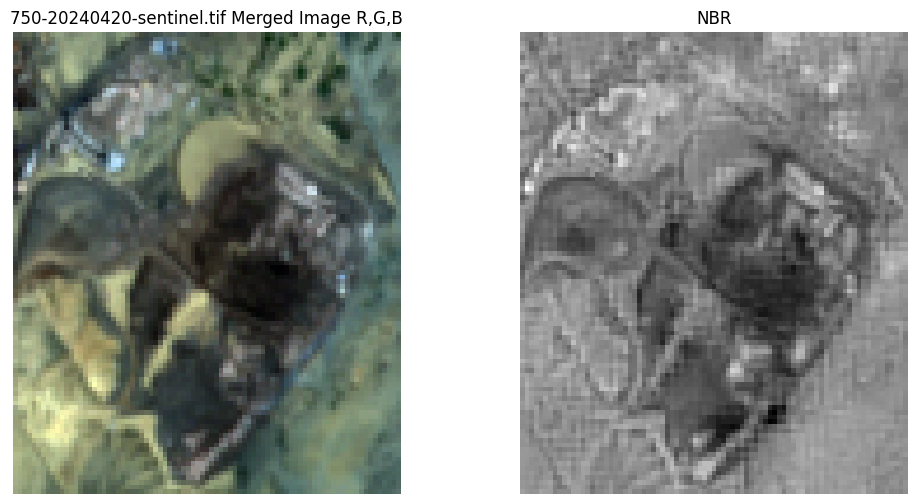

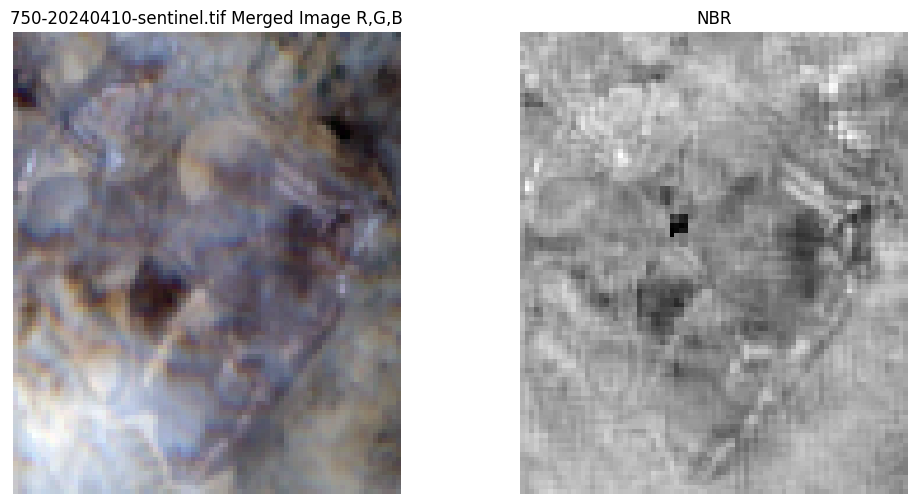

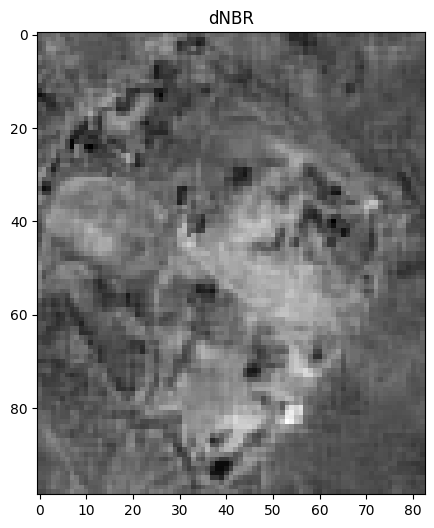

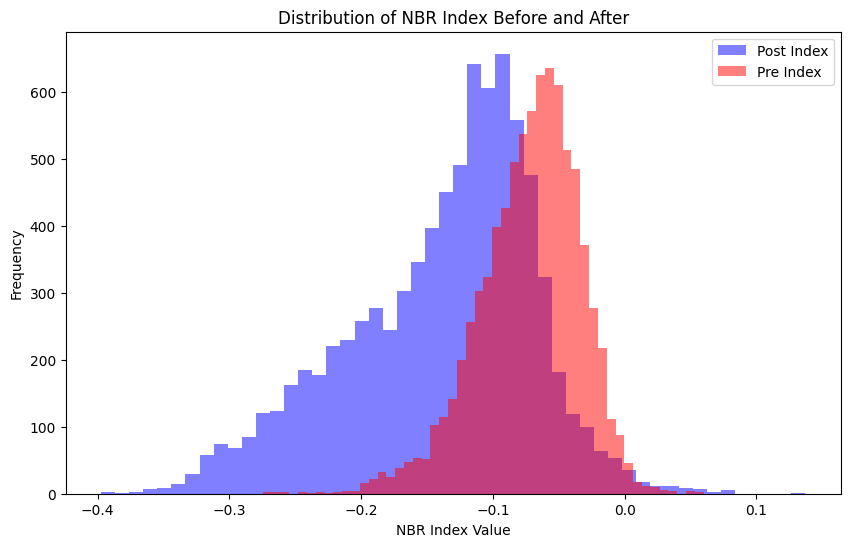

0.06665879309716105


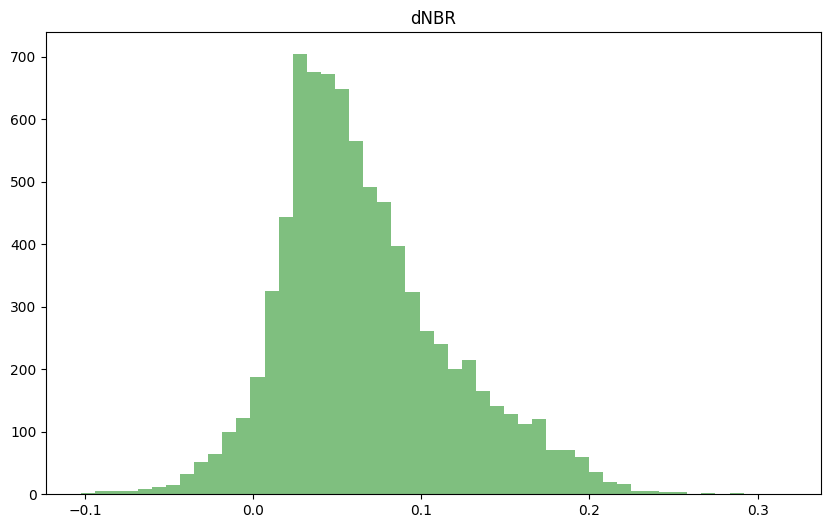

In [ ]:
# show the compared exampls :
target_post_filename="750-20240420-sentinel.tif"
def show_nbr_comparation(filename=target_post_filename):
    target_post_filename=filename
    target_pre_filename=get_pre_sentinel_filename(target_post_filename)



    post_index=show_nbr(target_post_filename)
    pre_index=show_nbr(target_pre_filename)


    dNBR=pre_index-post_index
    # show the dNBR in a plot
    plt.figure(figsize=(10, 6))
    plt.imshow(dNBR, cmap='gray')
    plt.title('dNBR')
    plt.show()


    # show the distribution of the post_index and pre_index in one plot
    # Create a figure with one subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the distribution of post_index
    ax.hist(post_index.flatten(), bins=50, alpha=0.5, label='Post Index', color='blue')

    # Plot the distribution of pre_index
    ax.hist(pre_index.flatten(), bins=50, alpha=0.5, label='Pre Index', color='red')

    # Add titles and labels
    ax.set_title('Distribution of NBR Index Before and After')
    ax.set_xlabel('NBR Index Value')
    ax.set_ylabel('Frequency')

    # Add a legend
    ax.legend()

    # Display the plot
    plt.show()


    print(np.mean(dNBR))
    # show the distribution of the dNBR
    plt.figure(figsize=(10, 6))
    plt.hist(dNBR.flatten(), bins=50, alpha=0.5, color='green')
    plt.title('dNBR')
    plt.show()
print("Showing the exampls")
show_nbr_comparation() # show the examples

## 3.Detection

### 3.1 Functions define

#### 3.1.0 Nomalization

In [4]:
## normalize function
#([15217.0, 9396.0, 14200.0, 12328.0], [24.0, 0.0, 0.0, 0.0])
result_max_value_list,result_min_value_list=[15217.0, 9396.0, 14200.0, 12328.0], [24.0, 0.0, 0.0, 0.0] # swir2, swir1, red, nir get from another function


# two method of the max and min, glob is based on the all tif files
def normalize_image_glob(band1,band2,band3,band4, min_value_list=result_min_value_list, max_value_list=result_max_value_list):
    """
    Normalize the SsWIR1, SWIR2, and Red bands.

    Parameters:
    band1 (numpy array): SWIR2 band matrix.
    band2 (numpy array): SWIR1 band matrix.
    band3 (numpy array): Red band matrix
    min_value (float): Minimum value for normalization.
    max_value (float): Maximum value for normalization.

    Returns:
    numpy array: Normalized band matrix.
    """
    normalized_band1 = (band1 - min_value_list[0]) / (max_value_list[0] - min_value_list[0])
    normalized_band2 = (band2 - min_value_list[1]) / (max_value_list[1] - min_value_list[1])
    normalized_band3 = (band3 - min_value_list[2]) / (max_value_list[2] - min_value_list[2])
    normalized_band4= (band4 - min_value_list[3]) / (max_value_list[3] - min_value_list[3])

    return normalized_band1, normalized_band2, normalized_band3, normalized_band4

# only based on the currenly file
def normalize_image_file(band1,band2,band3,band4):
    max1=np.max(band1)
    min1=np.min(band1)
    max2=np.max(band2)
    min2=np.min(band2)
    max3=np.max(band3)
    min3=np.min(band3)
    max4=np.max(band4)
    min4=np.min(band4)

    normalized_band1 = (band1 - min1) / (max1 - min1)
    normalized_band2 = (band2 - min2) / (max2 - min2)
    normalized_band3 = (band3 - min3) / (max3 - min3)
    normalized_band4 = (band4 - min4) / (max4 - min4)

    return normalized_band1, normalized_band2, normalized_band3, normalized_band4

# for bands normalize
def normalize_band(band):
    max1=np.max(band)
    min1=np.min(band)
    return (band-min1)/(max1-min1)



#### 3.1.1 Show Images

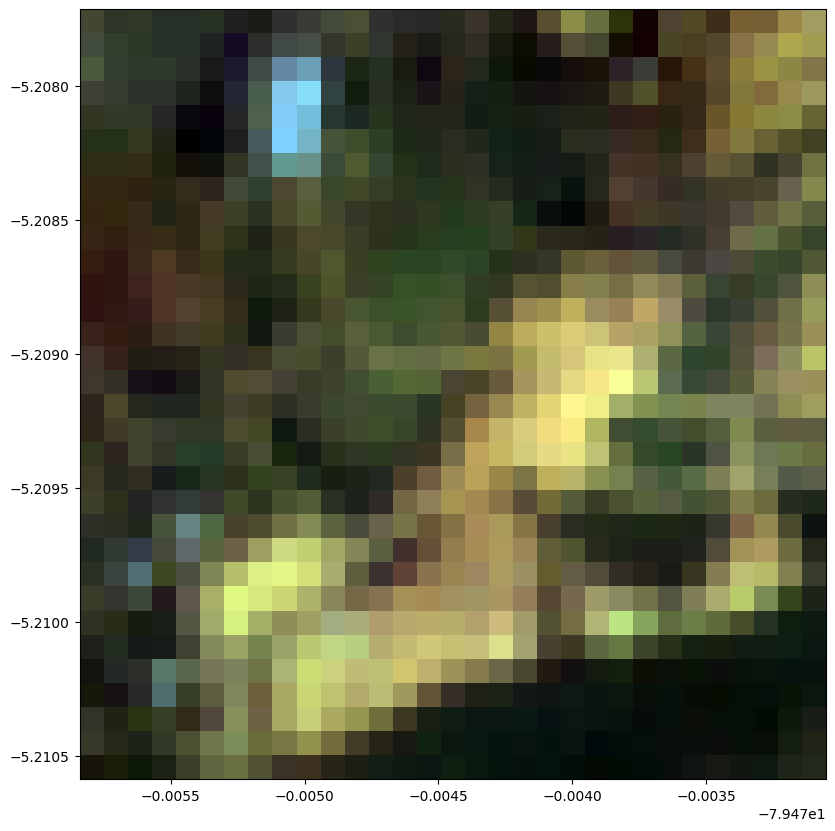

In [24]:
path="/content/drive/My Drive/sentinel_tif_mean/"
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
def show_tif_image(file_path, bands=None):
    """
    Function to display a .tif image file using rasterio.

    Parameters:
    file_path (str): The path to the .tif image file.
    bands (tuple): The bands to use for visualization (default is (4, 3, 2) for RGB).
    """
    try:
        # Set default bands to RGB if not provided
        if bands is None:
            bands = (4, 3, 2)  # Sentinel-2 True Color bands

        # Open the .tif file
        with rasterio.open(file_path) as src:
            # Read the specified bands
            img = src.read(bands)

            # Display the image
            plt.figure(figsize=(10, 10))
            show(img, transform=src.transform, adjust='linear')
    except Exception as e:
        print(f"An error occurred: {e}")

import random
# random pick from the path
random_tif_file = random.choice(os.listdir(path))
show_tif_image(path+random_tif_file)


In [ ]:
# find the red point in the 3 bands of SWIR1 SWIR2 red
# define  a color threshold for the bands to show data 0.5


swir2_threshold=0.6
swir1_threshold=0.5
red_threshold=0.5

# function show the original image , and highlited image
# swir2 , swir 1, red ()  after normalzation
saveimg_path="/content/drive/My Drive/Dumpsite_Images/FireBurn_detection_result/"

def show_images(filename,band1,band2,band3,threshold1=swir2_threshold,threshold2=swir1_threshold,threshold3=red_threshold,isSaveimage=False):


    # rule one
    # highlighted_mask=(band1>threshold1 ) & (band2<threshold2) & (band3<threshold3)

    #rule two
    # threshold with 1/3 to reduce the noise when we want to get the red pixel of the 3 bands. threshold will ensure the red is significantlly higher than other 2
    # why use 0.2 ? several attemps
    highlighted_mask= (
        (band1 > band2+0.1) &
        (band1 > band3+0.1) )



    merged_im= np.dstack((band1,band2,band3)) # original image

    # get the highlight image of original image
    highlight_im=np.zeros_like(merged_im)
    highlight_im[highlighted_mask]=merged_im[highlighted_mask]


    # diplay the original
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    ax1.imshow(merged_im)
    ax1.set_title(f"Original Image: {filename}")
    ax2.imshow(highlight_im)
    ax2.set_title(f"Highlighted Image{filename}")


    if isSaveimage:
        index, time, _ = filename.split('-')
        plt.savefig(saveimg_path + f"{index}-{time}.jpeg", format='jpeg')
    plt.show()

    # count the pixel of the masked from the image :
    pixel_count = np.sum(highlighted_mask)
    print("Pixel count:", pixel_count)

    # show the pixel percentage of the masked from the image:
    pixel_percentage = (pixel_count / (merged_im.shape[0] * merged_im.shape[1])) * 100
    print("Pixel percentage:", pixel_percentage)

    # a new mask for a binary image , 0 is non-burned, 1 is burned.





In [ ]:
# show image without normaliz bands

def show_images_non_normal(filename, r,g,b,swir2,swir1,nir):
    r,g,b,nir=normalize_image_file(r,g,b,nir)
    merged_im_rgb = np.dstack((r,g,b))

    # show both the merged_im_rgb and merged_im_s2s1r

    highlight_mask=(
        (swir2>swir1) & (swir2>r)
    )
    highlight_im=np.zeros_like(merged_im_rgb)
    highlight_im[highlight_mask]=merged_im_rgb[highlight_mask]

    swir2,swir1,r,nir=normalize_image_file(swir2,swir1,r,nir)
    merged_sw2sw1r=np.dstack((swir2,swir1,r))

    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
    ax1.imshow(merged_im_rgb)
    ax1.set_title(f"Original Image: {filename}")
    ax2.imshow(highlight_im)
    ax2.set_title(f"Highlighted Image{filename}")
    ax3.imshow(merged_sw2sw1r)
    ax2.set_title(f"sw2sw1r Image{filename}")



In [ ]:
# using 3bands show the image
import matplotlib.pyplot as plt
import numpy as np

# both nomalized and un-nomailzed
def show_image_3bands(filename,b1,b2,b3):
    # show the image from the 3 bands
    # check out normalized or not
    if np.max(b1)>1 or np.max(b2)>1 or np.max(b3)>1:
      b1=normalize_band(b1)
      b2=normalize_band(b2)
      b3=normalize_band(b3)
    merged_image=np.dstack((b1,b2,b3))
    plt.figure(figsize=(10, 10))
    plt.imshow(merged_image)
    plt.title(f"Image from {filename}")
    plt.axis('off')
    plt.show()



#### 3.1.2 Detect Method

###### Detection1

In [ ]:
# option1 , nir , swir2>swir1 &swir2 >red .nomalize the data from 0 to 1
# normalized , glob data
analysis_threshold=[]
threshold_bands=0.2 # from the analysis from 0.1 to 0.6 choose the min threshold which could get more pixels
non_record=[]

import numpy as np

# preivous method
def detect_fire_multi_criteria(swir2,swir1,red,nir):
    """
    Identify fire or burning issues using SWIR1, SWIR2, and Red bands.
    Parameters:
    band1 (numpy array): SWIR2 band matrix. after normalized
    band2 (numpy array): SWIR1 band matrix. after normalized
    band3 (numpy array): Red band matrix. after normalized
    band4 (numpy array): NIR band matsrix. after normalized

    Returns:
    float: Percentage of pixels detected as fire.
    """
    # Calculate the Normalized Burn Ratio (NBR)
    nbr = (nir - swir2) / (swir2 + nir)


    # Dynamic threshold based on scene statistics
    # find out the significantly higher than the average.

    mean_swir2 = np.mean(swir2)
    std_swir2 = np.std(swir2)
    dynamic_threshold = mean_swir2 + std_swir2 # get more pixels
    if dynamic_threshold is None:
        non_record.append(1)
    print("Dynamic Threshold:", dynamic_threshold)
    analysis_threshold.append(dynamic_threshold) # for analysis the threshold

    # 90 95, try

    # Initial fire mask based on multiple indices and dynamic threshold
    highlighted_mask = (
        (swir2 > swir1) &
        (swir2 > red)
    )



    pixel_count = np.sum(highlighted_mask)
    pixel_percentage = (pixel_count / (swir2.shape[0] * swir2.shape[1])) * 100

    print(f"Pixel count{pixel_count}, Pixel percentage{pixel_percentage}")

    return pixel_percentage




###### Detection2

In [ ]:
### option2 do just (swir2>swir1) & (swir2>red) without  normalize

def detect_fire_non_normalized(swir2,swir1,red,NIR):
    highlighted_mask=(
        (swir2>swir1) & (swir2>red)
    )

    pixel_count = np.sum(highlightes}, Pixel percentage{pixel_percentage}")

    return pixel_percentage

###### Detection3

In [3]:
### option3
# https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/active_fire_detection/

import numpy as np
import rasterio
import matplotlib.pyplot as plt

def index(band1, band2):
    return (band1 - band2) / (band1 + band2)

tif_folder_path= '/content/drive/My Drive/sentinel_tif_mean'
def detect_active_fire(tif_name,tif_path=tif_folder_path, show_image=False):
    # Read the TIFF file
    tif_path=tif_folder_path+'/'+tif_name
    with rasterio.open(tif_path) as src:
        B02 = normalize_band(src.read(2) ) # Assuming B02 is in the blue
        B03 = normalize_band(src.read(3) ) # Assuming B03 is in the green
        B04 = normalize_band(src.read(4) ) # Assuming B04 is in the red
        B11 = normalize_band(src.read(11)) # Assuming B11 is in the SWIR 1
        B12 = normalize_band(src.read(12)) # Assuming B12 is in the SWIR 2
        B8= normalize_band(src.read(8)) # Assuming B8 is in the nir

    # Calculate indices
    NGDR = index(B02, B03) # vegetation, water, and possibly smoke or clouds.
    # filter the blue band , cloud ,smoke
    Inverse = (B02 - 0.2) / (0.5 - 0.2)
    SAHM_INDEX = (B12 - B11) / (B12 + B11) #Shortwave Active Fire Monitoring

    # Initialize output image and fire count
    output_image = np.zeros((B04.shape[0], B04.shape[1], 3), dtype=np.float32)
    fire_pixels = 0
    fire_pixels_position=[]
    # Apply the algorithm
    for i in range(B04.shape[0]):
        for j in range(B04.shape[1]):
            if Inverse[i, j] > 1:
                output_image[i, j] = [0.5 * B04[i, j], 0.5 * B03[i, j], 20 * B02[i, j]]
            elif Inverse[i, j] > 0 and NGDR[i, j] > 0:
                output_image[i, j] = [0.5 * B04[i, j], 0.5 * B03[i, j], 20 * B02[i, j]]
            elif SAHM_INDEX[i, j] > 0.4 or B12[i, j] > 1: # because the threshold
                output_image[i, j] = [20 * B04[i, j], 1 * B03[i, j], 1 * B02[i, j]]
                fire_pixels += 1  # Count fire pixel
                fire_pixels_position.append((i,j)) # add the pixels position
            else:
                output_image[i, j] = [B04[i, j], B04[i, j], B04[i, j]]

    # Calculate fire pixel percentage
    total_pixels = B04.shape[0] * B04.shape[1]
    fire_pixel_percentage = (fire_pixels / total_pixels)

    if show_image:
      # Plot the result
      plt.imshow(output_image)
      plt.title(f'Active Fire Detection{tif_name}')
      plt.show()

      natural_image=np.dstack((B04,B03,B02))
      # show natural plt
      plt.imshow(natural_image)
      plt.title(f'Natural Image {tif_name}')
      plt.show()


    print(tif_name)
    return fire_pixel_percentage, fire_pixels_position



###### Show example

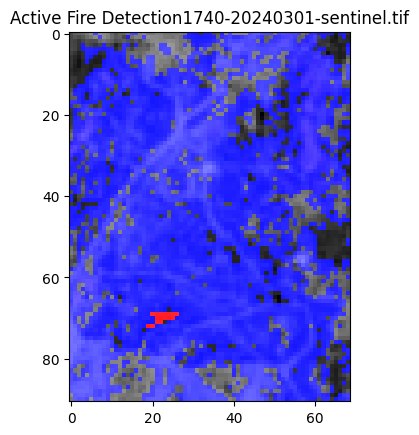

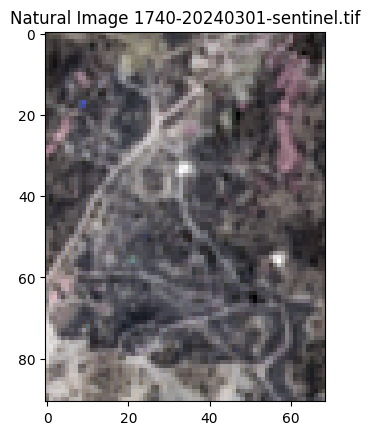

1740-20240301-sentinel.tif
0.0025481764612199395


In [ ]:
# random show some image
file_path= '/content/drive/My Drive/sentinel_tif_mean'
import random
random_tif_file = random.choice(os.listdir(file_path))
print(detect_active_fire(random_tif_file,tif_path=file_path, show_image=True))

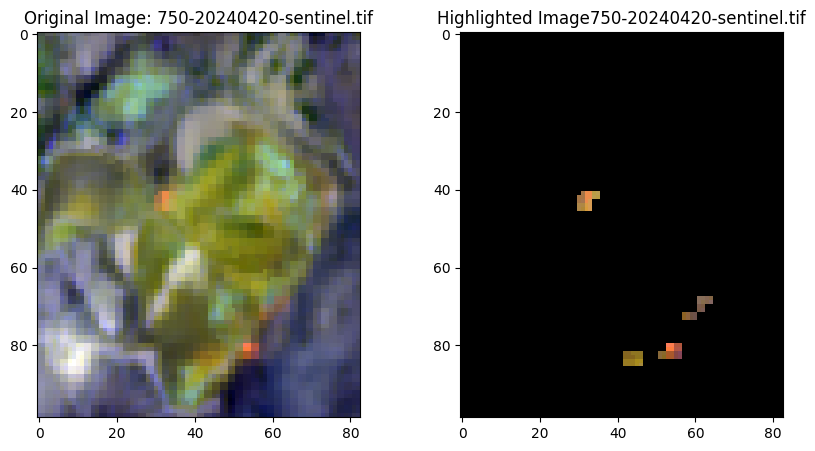

Pixel count: 83
Pixel percentage: 1.0101010101010102


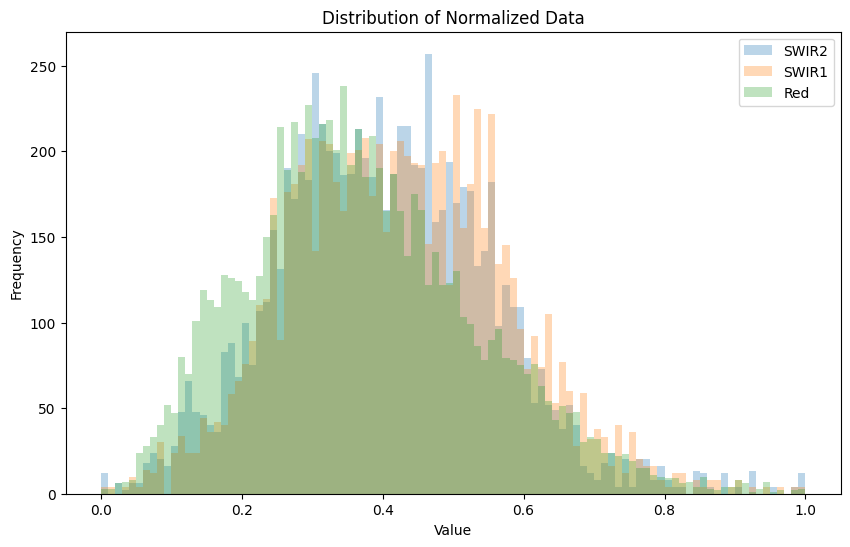

In [ ]:
# run the show_images function
# show the distribution of the data : normalized_swir2 ,normalized_swir1 , normalized_red in one plot with 3 color

show_images(target_file_name,normalized_swir2,normalized_swir1,normalized_red)

# Plotting the distributions
plt.figure(figsize=(10, 6))

plt.hist(normalized_swir2.flatten(), bins=100, alpha=0.3, label='SWIR2')
plt.hist(normalized_swir1.flatten(), bins=100, alpha=0.3, label='SWIR1')
plt.hist(normalized_red.flatten(), bins=100, alpha=0.3, label='Red')


plt.title('Distribution of Normalized Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


### 3.2 Evaluation of the Threshold and Method

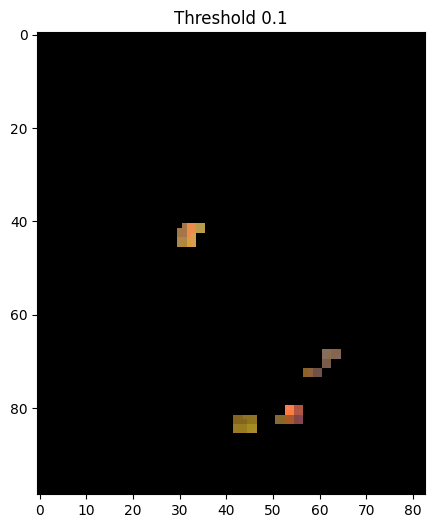

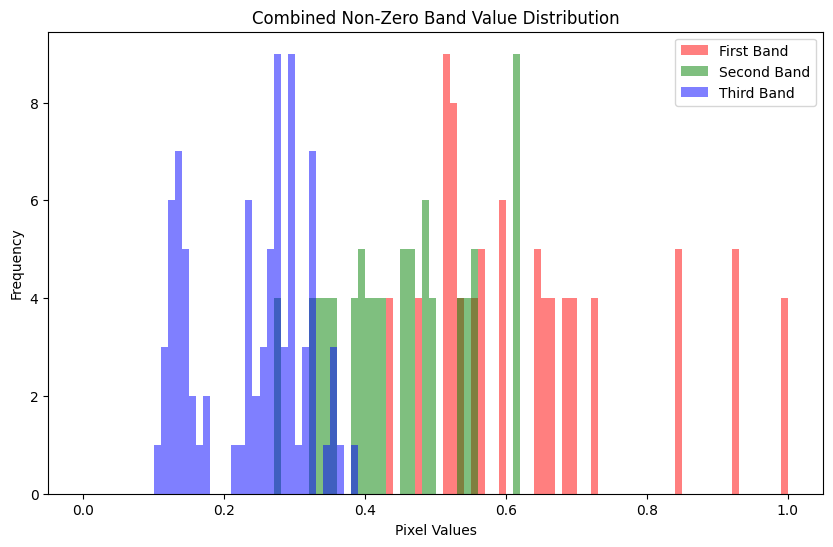

Pixel count: 83
Pixel percentage: 1.0101010101010102


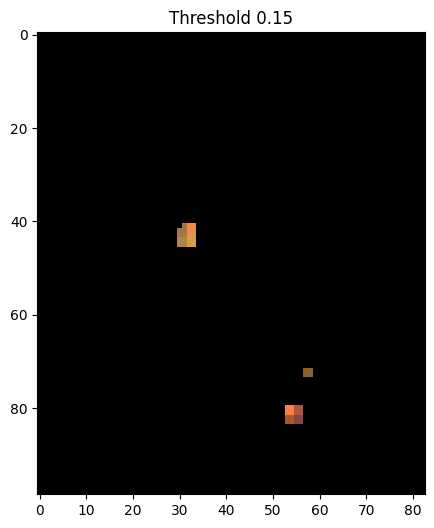

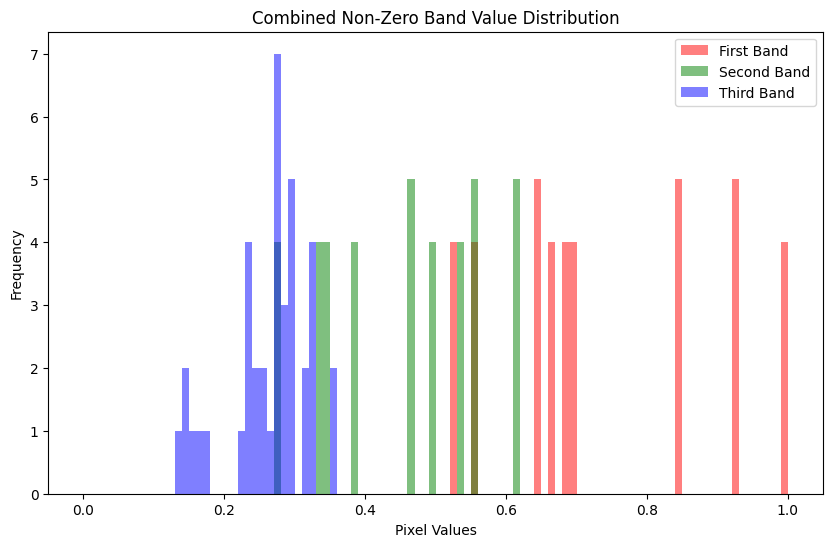

Pixel count: 39
Pixel percentage: 0.4746257758305951


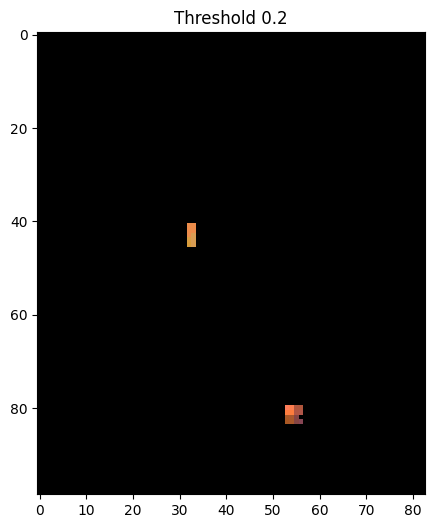

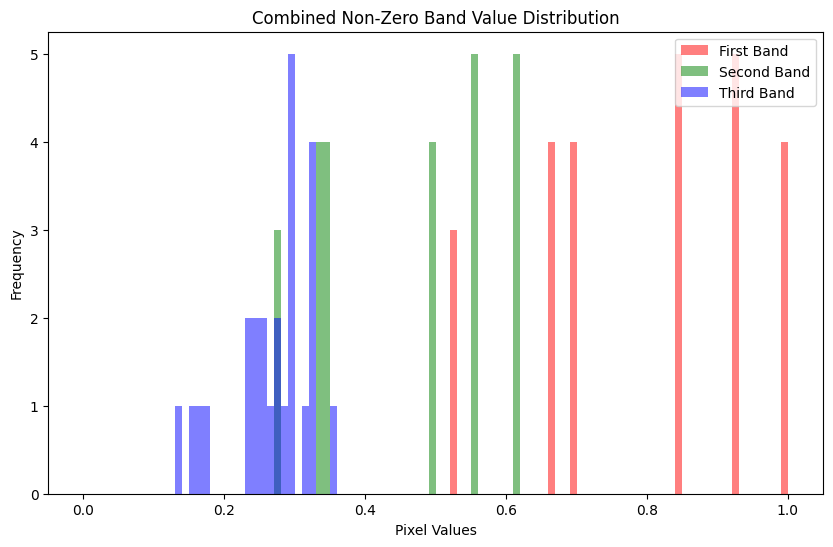

Pixel count: 25
Pixel percentage: 0.30424729219909946


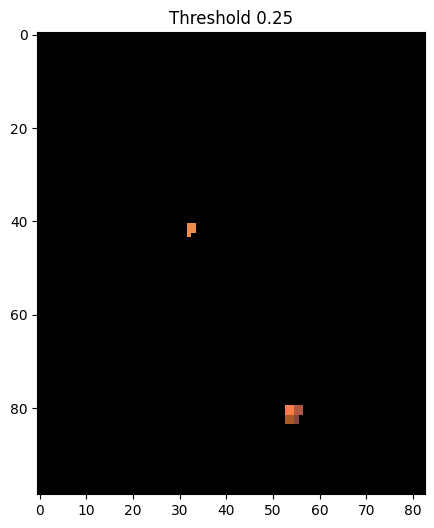

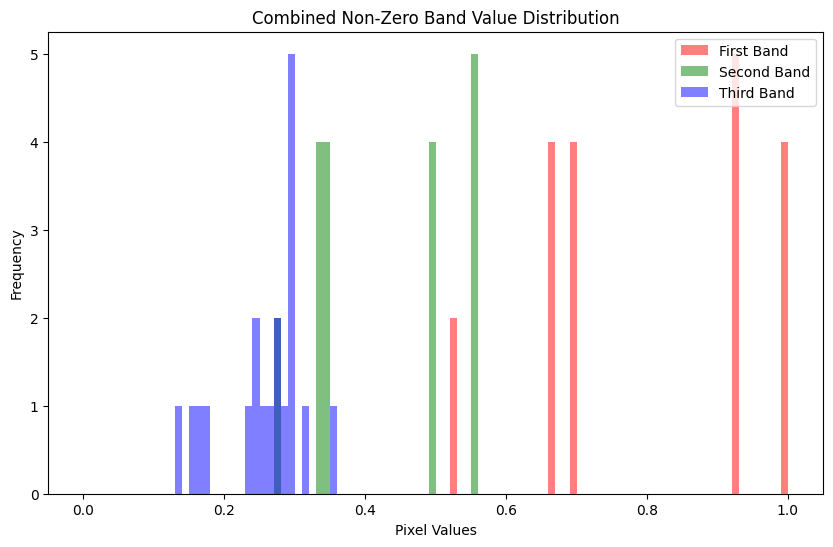

Pixel count: 19
Pixel percentage: 0.23122794207131558


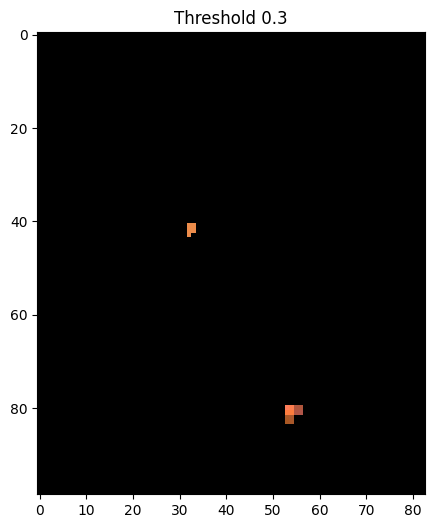

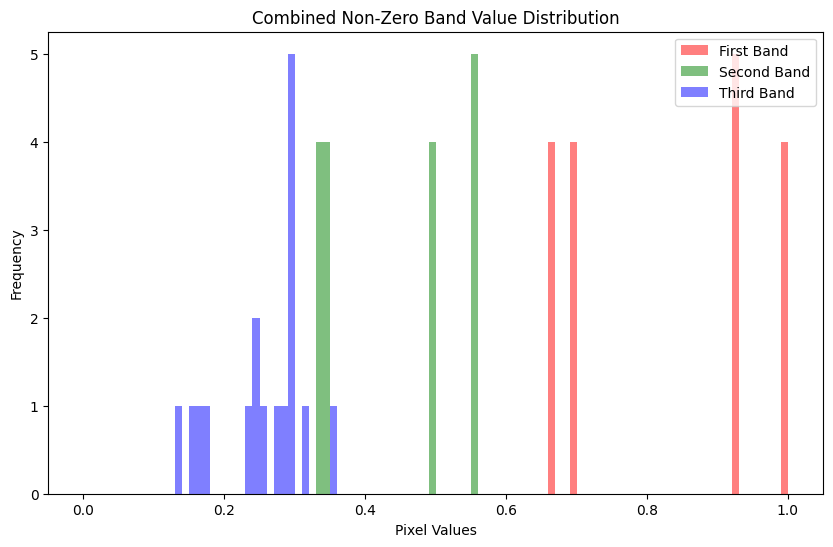

Pixel count: 17
Pixel percentage: 0.2068881586953876


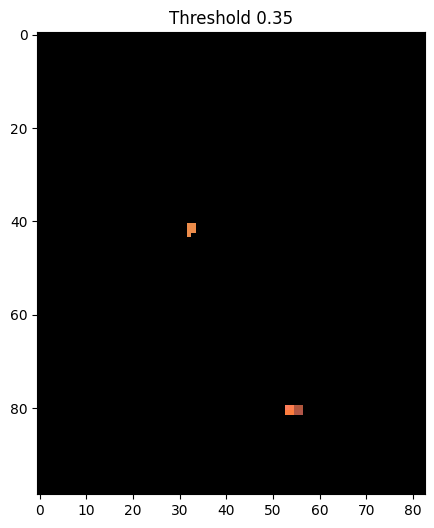

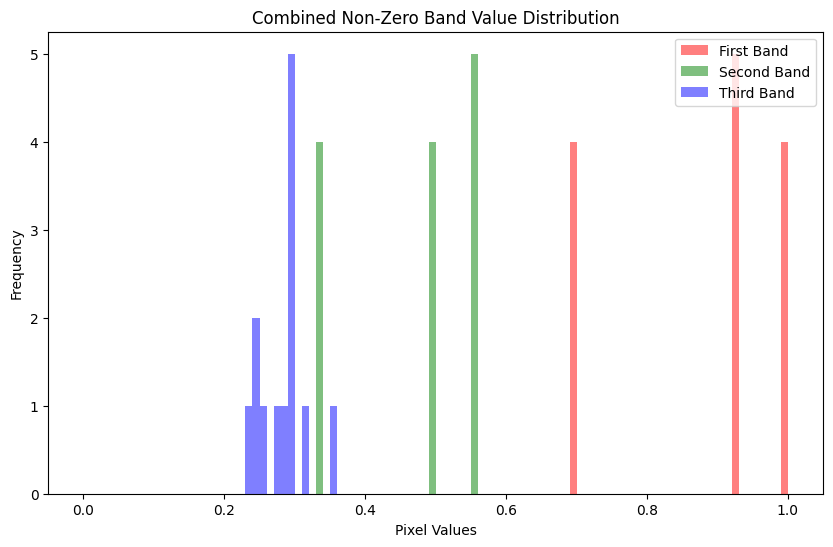

Pixel count: 13
Pixel percentage: 0.1582085919435317


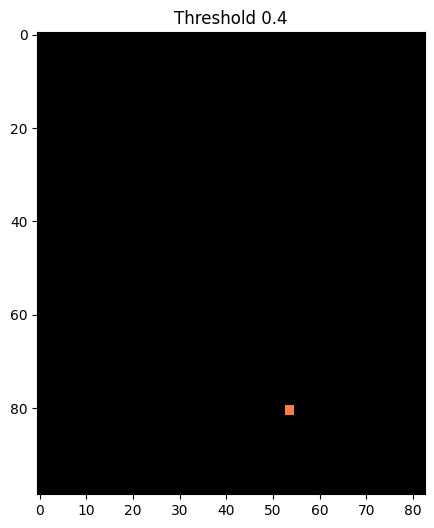

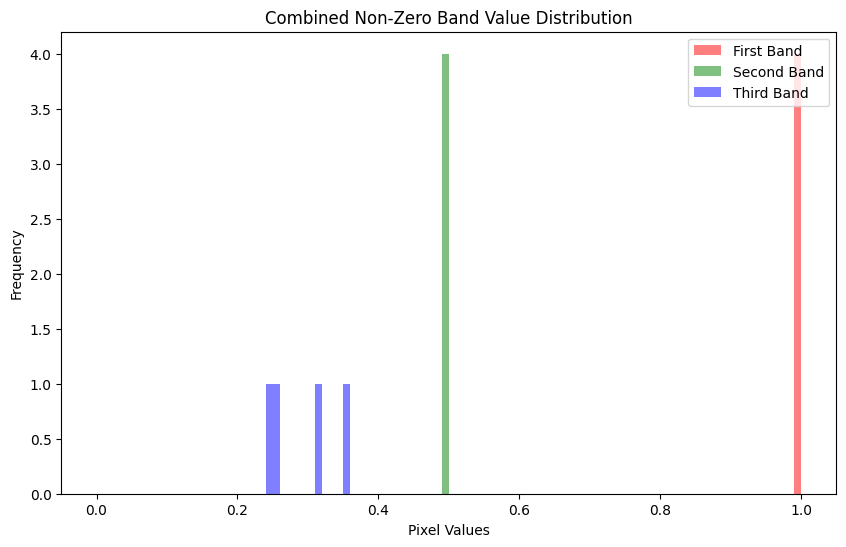

Pixel count: 4
Pixel percentage: 0.04867956675185591


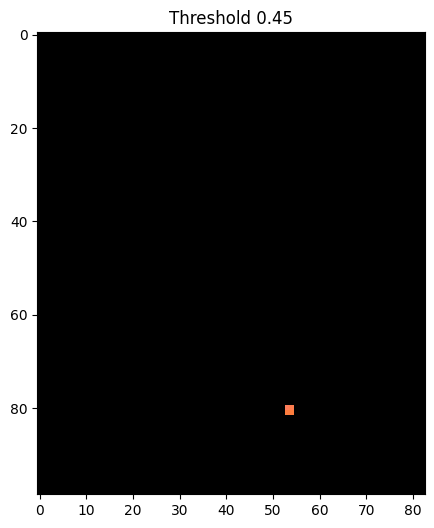

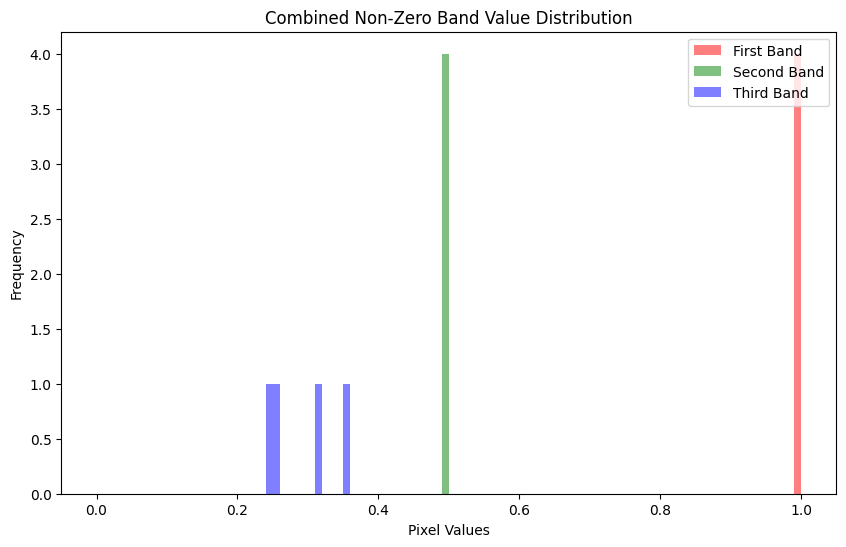

Pixel count: 4
Pixel percentage: 0.04867956675185591


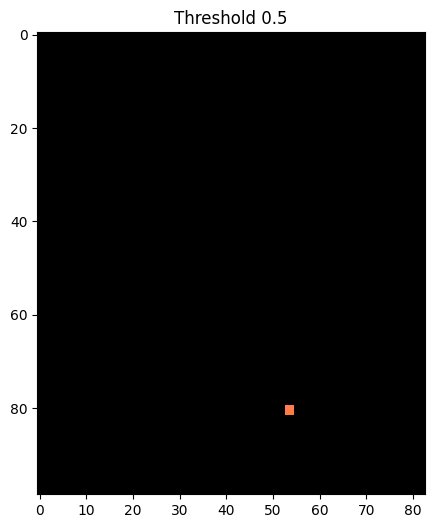

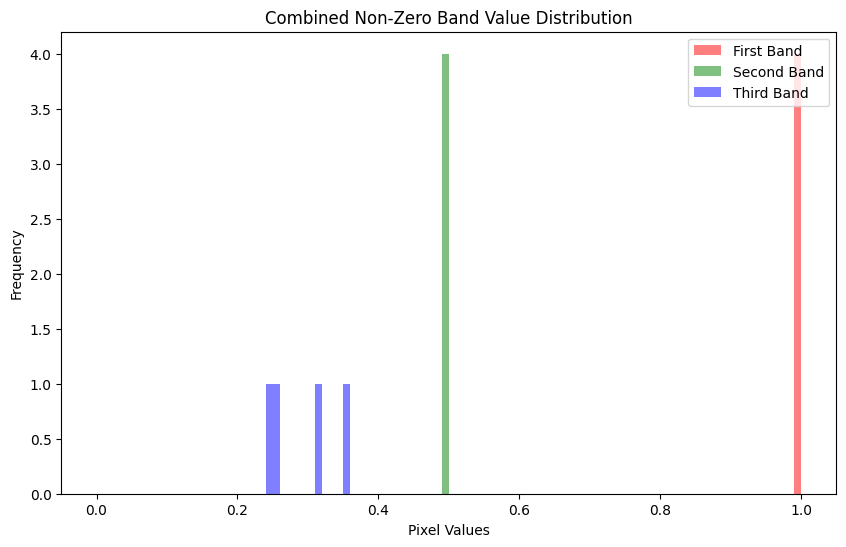

Pixel count: 4
Pixel percentage: 0.04867956675185591


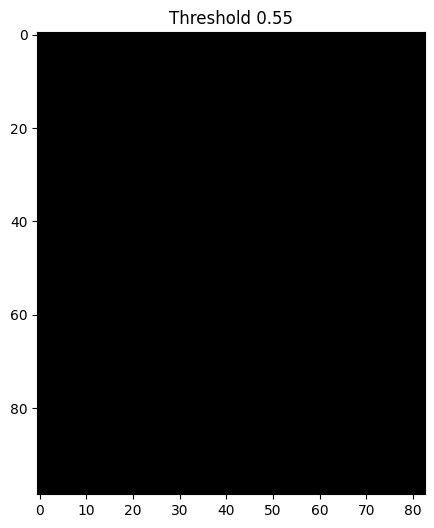

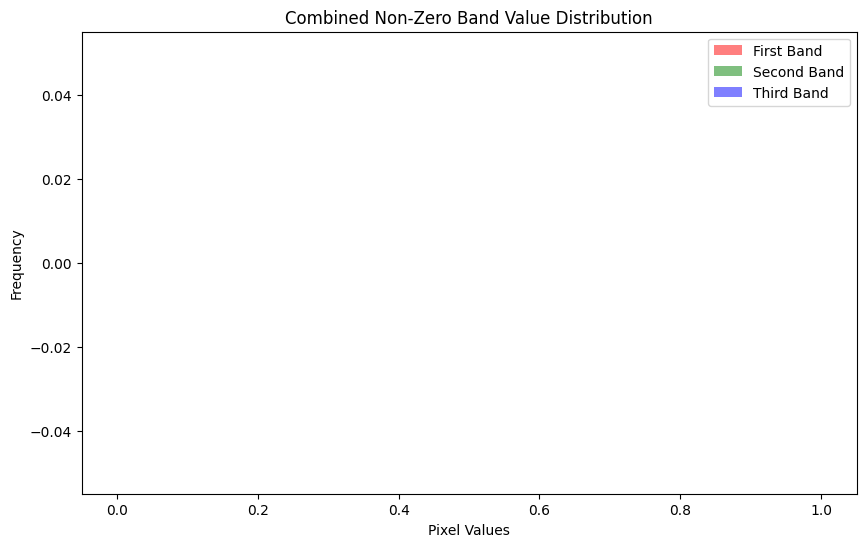

Pixel count: 0
Pixel percentage: 0.0


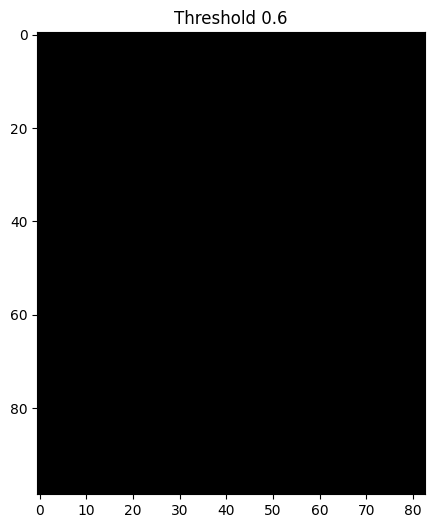

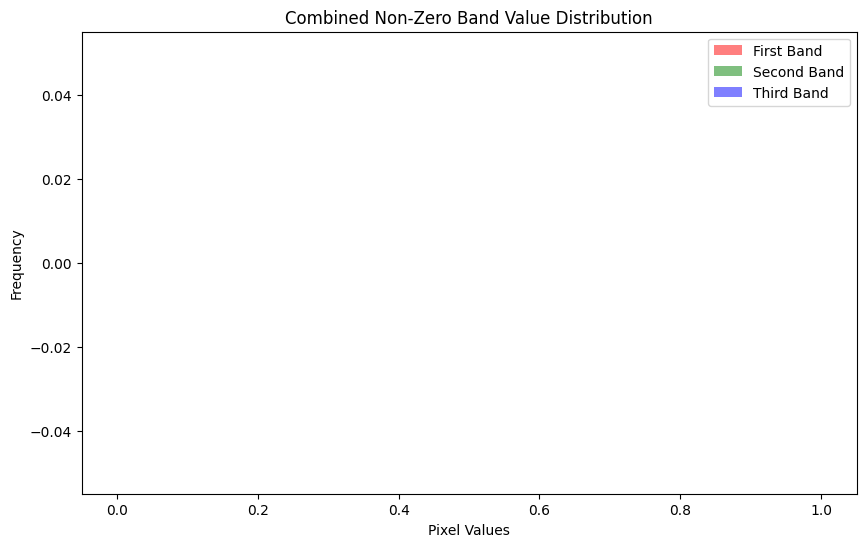

Pixel count: 0
Pixel percentage: 0.0


In [ ]:

# Assuming highlight_im is your image with shape (height, width, 3)
def plot_combined_band_histogram_nonzero(image):
    # Extract the bands and filter out zero values
    band1 = image[:, :, 0]
    band2 = image[:, :, 1]
    band3 = image[:, :, 2]

    band1_nonzero = band1[band1 > 0]
    band2_nonzero = band2[band2 > 0]
    band3_nonzero = band3[band3 > 0]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    plt.hist(band1_nonzero.flatten(), bins=100, range=(0, 1), color='red', alpha=0.5, label='First Band')
    plt.hist(band2_nonzero.flatten(), bins=100, range=(0, 1), color='green', alpha=0.5, label='Second Band')
    plt.hist(band3_nonzero.flatten(), bins=100, range=(0, 1), color='blue', alpha=0.5, label='Third Band')

    plt.title('Combined Non-Zero Band Value Distribution')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

    plt.show()


# show the red color with multiple threshold
threshold_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
for i in threshold_list:
    # creat a new mast for the red is higher than green and blue and the greater than the threshold in the list
    swir2_mean=np.mean(normalized_swir2)
    swir2_std=np.std(normalized_swir2)
    dynamic_threshold=swir2_mean+swir2_std

    highlighted_mask=(normalized_swir2>normalized_swir1+i) & (normalized_swir2>normalized_red+i)
    merged_im= np.dstack((normalized_swir2,normalized_swir1,normalized_red)) # original image
 # Create a color image where only red areas are shown

    highlight_im=np.zeros_like(merged_im)
    highlight_im[highlighted_mask]=merged_im[highlighted_mask]

    plt.figure(figsize=(10, 6))
    plt.imshow(highlight_im)
    plt.title(f'Threshold {i}')
    plt.show()


    plot_combined_band_histogram_nonzero(highlight_im)


    plt.show()
    # count the pixel of the masked from the image :
    pixel_count = np.sum(highlighted_mask)
    print("Pixel count:", pixel_count)
    # show the pixel percentage of the masked from the image:
    pixel_percentage = (pixel_count / (merged_im.shape[0] * merged_im.shape[1])) * 100
    print("Pixel percentage:", pixel_percentage)

    # show the distribution of the merged_im in one plot for 3 bands




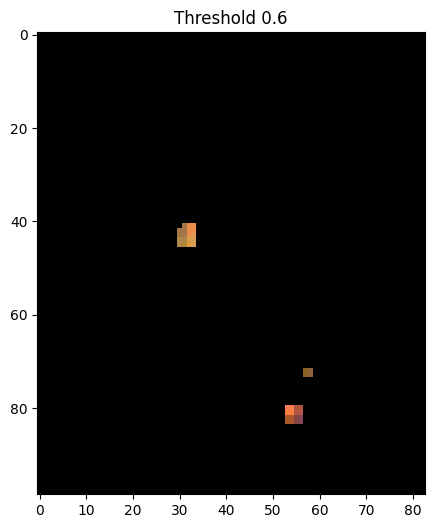

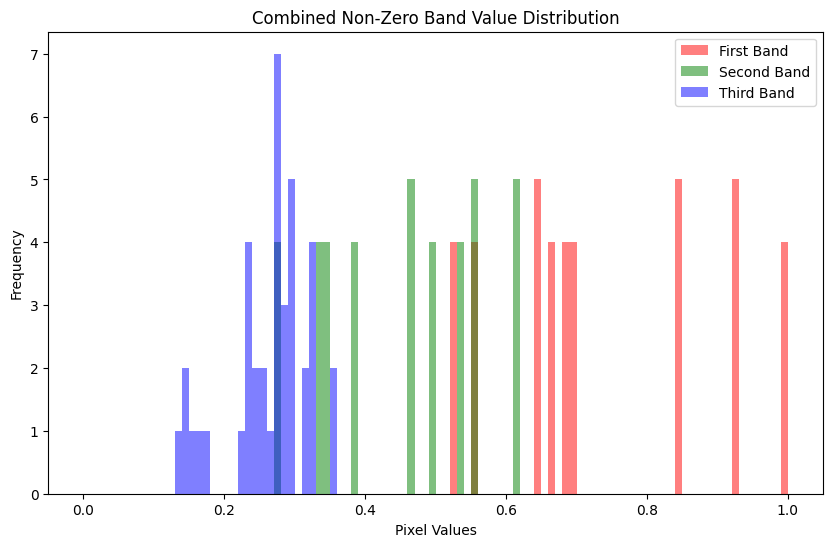

Pixel count: 39
Pixel percentage: 0.4746257758305951


In [ ]:
# Multiple strategies
# - nbr

#indice
target_nbr= (normalized_nir-normalized_swir2)/(normalized_nir+normalized_swir2)

# Dynamic threshold based on scene statistics
mean_swir2 = np.mean(normalized_swir2)
std_swir2 = np.std(normalized_swir2)
dynamic_threshold = mean_swir2 +  std_swir2

# Initial fire mask based on multiple indices and dynamic threshold
highlighted_mask = (
    (normalized_swir2 > normalized_swir1+0.15) &
    (normalized_swir2 > normalized_red+0.15) &

    (target_nbr < -0.1)
)



merged_im= np.dstack((normalized_swir2,normalized_swir1,normalized_red)) # original image

highlight_im=np.zeros_like(merged_im)
highlight_im[highlighted_mask]=merged_im[highlighted_mask]

plt.figure(figsize=(10, 6))
plt.imshow(highlight_im)
plt.title(f'Threshold {i}')
plt.show()


plot_combined_band_histogram_nonzero(highlight_im)


plt.show()
# count the pixel of the masked from the image :
pixel_count = np.sum(highlighted_mask)
print("Pixel count:", pixel_count)
# show the pixel percentage of the masked from the image:
pixel_percentage = (pixel_count / (merged_im.shape[0] * merged_im.shape[1])) * 100
print("Pixel percentage:", pixel_percentage)


In [ ]:
# get the min, max through whole folder ,  for normalization function
# and directly use the result without runing it again
# get the 3 max_value/min_value for each bands from the whole folder , scan all the tif with these three bands and get the max_value/ min_value

import time
# define max_value and min_value for 3 bands
max_value_list=[0,0,0,0] # order by : swir2,swir1,red
min_value_list=[10001,10001,10001,10001] # order by : swir2,swir1,red

source_path='/content/drive/My Drive/sentinel_tif_mean'

start_time = time.time()

def get_max_min_value(source_path):
    count=0
    for filename in os.listdir(source_path):
       count+=1
       if filename.endswith('.tif'):
          # print the filename ,but update in same line in output
          print(f"\r{count},{filename}", end='', flush=True)
          # Open the GeoTIFF file
          with rasterio.open(os.path.join(source_path, filename)) as src:
              # Read the data from the GeoTIFF file
              data = src.read()
              swir1=data[10]
              swir2=data[11]
              red=data[3]
              nir=data[7]
              max_value_list[0]=max(max_value_list[0],np.max(swir2))
              max_value_list[1]=max(max_value_list[1],np.max(swir1))
              max_value_list[2]=max(max_value_list[2],np.max(red))
              max_value_list[3]=max(max_value_list[3],np.max(nir))

              min_value_list[0]=min(min_value_list[0],np.min(swir2))
              min_value_list[1]=min(min_value_list[1],np.min(swir1))
              min_value_list[2]=min(min_value_list[2],np.min(red))
              min_value_list[3]=min(min_value_list[3],np.min(nir))

    # print the max min of 3 bands
    return max_value_list,min_value_list

print("Get the max and min in all the tif for nomalize ",get_max_min_value(source_path))

end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f'The function took {elapsed_time:.2f} seconds to run.')


#([15217.0, 9396.0, 14200.0, 12328.0], [24.0, 0.0, 0.0, 0.0])


#### Result of max,min globly

Record for the result of the max_vlaue_list, min _value_list for the folder's tif :
max and min in all the tif for nomalize  ([15217.0, 9396.0, 14200.0], [24.0, 0.0, 0.0])

### 3.3 Run detection

##### 3.3.1 Detection1

In [ ]:

# iterate all the file in /content/drive/My Drive/sentinel_tif_mean
# for 39x3x12 tif files would spend 6 mins

tif_folder_path= '/content/drive/My Drive/sentinel_tif_mean'
import time
start_time = time.time()

# two dictionary to save the detected result one is based on the file normalization , one is based on the glob normalization
detection_result_1={}

count =0
# iterate all the tif file of the folder to get the three bands of the tif
for filename in os.listdir(tif_folder_path):
    count +=1
    if filename.endswith('.tif'):
        print(f"\r{count},{filename}", end='', flush=True)
        # Open the GeoTIFF file
        with rasterio.open(os.path.join(tif_folder_path, filename)) as src:
            # Read the data from the GeoTIFF file
            data = src.read()
            swir1=data[10]
            swir2=data[11]
            red=data[3]
            nir=data[7]
            ng_swir2,ng_swir1,ng_red,ng_nir=normalize_image_glob(swir2,swir1,red,nir)

            detection_result_1[filename]=detect_fire_multi_criteria(ng_swir2,ng_swir1,ng_red,ng_nir)



# plot the distribution of the detection_bool_list

end_time=time.time()
print(f'The function took {end_time - start_time:.2f} seconds to run.')





1,662-20230810-sentinel.tifDynamic Threshold: 0.22914167000607827
Pixel count12, Pixel percentage0.09569377990430622
2,661-20230810-sentinel.tifDynamic Threshold: 0.19865044754746455
Pixel count0, Pixel percentage0.0
3,1715-20230810-sentinel.tifDynamic Threshold: 0.29528591786460096
Pixel count0, Pixel percentage0.0
4,388-20230810-sentinel.tifDynamic Threshold: 0.30382595369593807
Pixel count0, Pixel percentage0.0
5,1804-20230810-sentinel.tifDynamic Threshold: 0.3148033307743292
Pixel count0, Pixel percentage0.0
6,492-20230810-sentinel.tifDynamic Threshold: 0.2650058472570952
Pixel count0, Pixel percentage0.0
7,419-20230810-sentinel.tifDynamic Threshold: 0.29571274924991975
Pixel count0, Pixel percentage0.0
8,448-20230810-sentinel.tifDynamic Threshold: 0.28420914167686157
Pixel count0, Pixel percentage0.0
9,584-20230810-sentinel.tifDynamic Threshold: 0.2933902026831113
Pixel count0, Pixel percentage0.0
10,346-20230810-sentinel.tifDynamic Threshold: 0.30354486996244784
Pixel count0, Pix

<ipython-input-3-5dbbfd7b9687>:24: RuntimeWarning: invalid value encountered in divide
  nbr = (nir - swir2) / (swir2 + nir)


Dynamic Threshold: 0.17596144257734278
Pixel count0, Pixel percentage0.0
921,447-20240401-sentinel.tifDynamic Threshold: 0.17758303975920622
Pixel count0, Pixel percentage0.0
922,798-20240410-sentinel.tifDynamic Threshold: 0.2238689594330959
Pixel count0, Pixel percentage0.0
923,398-20240401-sentinel.tifDynamic Threshold: 0.1260480422770821
Pixel count0, Pixel percentage0.0
924,1639-20240410-sentinel.tifDynamic Threshold: 0.14180132338880846
Pixel count0, Pixel percentage0.0
925,1557-20240410-sentinel.tifDynamic Threshold: 0.1852491210104572
Pixel count0, Pixel percentage0.0
926,14-20240410-sentinel.tifDynamic Threshold: 0.13338335188153147
Pixel count0, Pixel percentage0.0
927,1171-20240410-sentinel.tifDynamic Threshold: 0.264660455943224
Pixel count0, Pixel percentage0.0
928,385-20240410-sentinel.tifDynamic Threshold: 0.208171866034223
Pixel count0, Pixel percentage0.0
929,1216-20240410-sentinel.tifDynamic Threshold: 0.18053368952393611
Pixel count0, Pixel percentage0.0
930,1271-2024

#### 3.3.2 Detection 2


In [ ]:
# get the result
import time
image_path="/content/drive/My Drive/sentinel_tif_mean"
start_time=time.time()
detection_result_2={}
for filename in os.listdir(image_path):
  if filename.endswith('.tif'):
        with rasterio.open(os.path.join(image_path, filename)) as src:
            data = src.read()
            swir1=data[10]
            swir2=data[11]
            red=data[3]
            nir=data[7]
            detection_result_2[filename]=detect_fire_non_normalized(swir2,swir1,red,nir)

end_time=time.time()
print(f'The function took {end_time - start_time:.2f} seconds to run.')


In [ ]:
import time
import pandas as pd

image_path="/content/drive/My Drive/sentinel_tif_mean"
start_time=time.time()


#### 3.3.3 Detection3


In [ ]:
# return dictionary type ,5 mins
tif_path= '/content/drive/My Drive/sentinel_tif_mean'
import time
start_time=time.time()

detection_result_3={}
for filename in os.listdir(tif_path):
  if filename.endswith('.tif'):
        detection_result_3[filename],persition_list=detect_active_fire(filename)


end_time=time.time()
print(f'The function took {end_time - start_time:.2f} seconds to run.')


In [4]:
# return the dataframe type , 5 mins
import time
import pandas as pd
import os

image_path="/content/drive/My Drive/sentinel_tif_mean"
start_time=time.time()

detection_3_df=pd.DataFrame(columns=["filename", "percentage", "position"])
for filename in os.listdir(image_path):
  if filename.endswith('.tif'):
        percentage,position_list=detect_active_fire(filename)
        new_row = { "filename": filename, "percentage": percentage, "position": position_list}
        detection_3_df = pd.concat([detection_3_df, pd.DataFrame([new_row])] , ignore_index=True)

end_time=time.time()
print(f'The function took {end_time - start_time:.2f} seconds to run.')

print(detection_3_df.head())

<ipython-input-3-ec8834b210e4>:9: RuntimeWarning: invalid value encountered in divide
  return (band1 - band2) / (band1 + band2)


662-20230810-sentinel.tif
661-20230810-sentinel.tif


<ipython-input-3-ec8834b210e4>:27: RuntimeWarning: invalid value encountered in divide
  SAHM_INDEX = (B12 - B11) / (B12 + B11) #Shortwave Active Fire Monitoring


1715-20230810-sentinel.tif
388-20230810-sentinel.tif
1804-20230810-sentinel.tif
492-20230810-sentinel.tif
419-20230810-sentinel.tif
448-20230810-sentinel.tif
584-20230810-sentinel.tif
346-20230810-sentinel.tif
1267-20230810-sentinel.tif
413-20230810-sentinel.tif
1806-20230810-sentinel.tif
1133-20230810-sentinel.tif
1134-20230810-sentinel.tif
1027-20230810-sentinel.tif
1740-20230810-sentinel.tif
1327-20230810-sentinel.tif
1343-20230810-sentinel.tif
1582-20230810-sentinel.tif
1212-20230810-sentinel.tif
1356-20230810-sentinel.tif
296-20230810-sentinel.tif
398-20230810-sentinel.tif
447-20230810-sentinel.tif
798-20230820-sentinel.tif
1557-20230820-sentinel.tif
1639-20230820-sentinel.tif
14-20230820-sentinel.tif
1171-20230820-sentinel.tif
1216-20230820-sentinel.tif
385-20230820-sentinel.tif
1271-20230820-sentinel.tif
545-20230820-sentinel.tif
750-20230820-sentinel.tif
1585-20230820-sentinel.tif
1188-20230820-sentinel.tif
1154-20230820-sentinel.tif
1189-20230820-sentinel.tif
662-20230820-sent

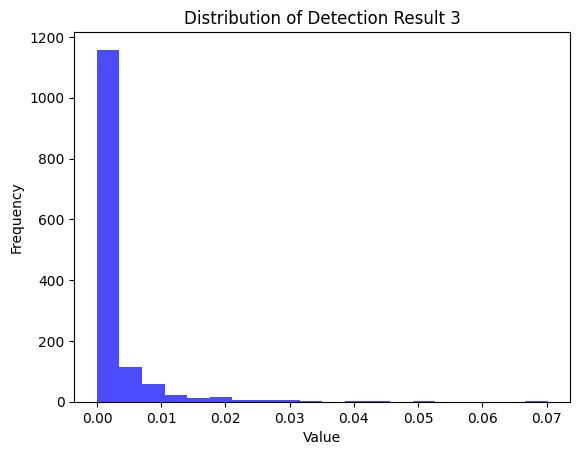

884


In [ ]:
# show the distributuion of the detection_result_3
plt.hist(list(detection_result_3.values()), bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Detection Result 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# get the count of values greater than 0
print(len(list(filter(lambda x:detection_result_3[x]>0,detection_result_3))))

#### 3.3.3 Show result

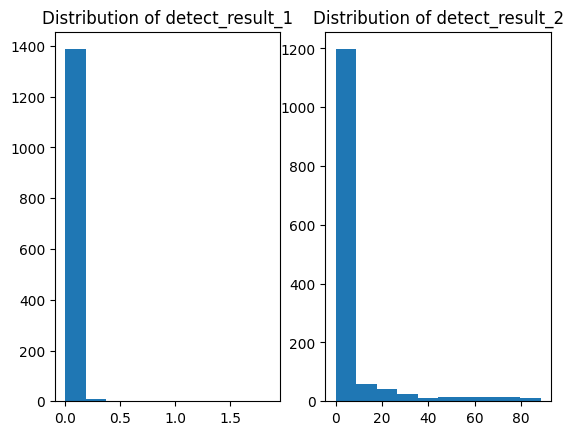

Method 1 Greater than 0, total is1404 , 51
Method 2 Greater than 0, total is1404 , 572


In [ ]:
# distribution of the 2 result
# save the result in the csv file
import matplotlib.pyplot as plt

detect_result_1_list=list(detection_result_1.values())
detect_result_2_list=list(detection_result_2.values())

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first list as a histogram on the first subplot
ax1.hist(detect_result_1_list)
ax1.set_title('Distribution of detect_result_1')

# Plot the second list as a histogram on the second subplot
ax2.hist(detect_result_2_list)
ax2.set_title('Distribution of detect_result_2')

# Show the plot
plt.show()

# get the count of the value greater than 0
print(f"Method 1 Greater than 0, total is{len(detect_result_1_list)} ,",len(list(filter(lambda x:detection_result_1[x]>0,detection_result_1))))
print(f"Method 2 Greater than 0, total is{len(detect_result_2_list)} ," ,len(list(filter(lambda x:detection_result_2[x]>0,detection_result_2))))


In [ ]:
# randomly show 10 of the result greater than 0 of the two list

image_path="/content/drive/My Drive/sentinel_tif_mean"
# define the randomly method to show the result
def show_random_sample(result):
    #parameter result is the dictionary

    all_images_name=list(filter(lambda x:result[x]>0,result))

    import random
    random_sample = random.sample(all_images_name, 10)

    for i in random_sample:
        # open this file with name of i
        with rasterio.open(os.path.join(image_path, i)) as src:
            data = src.read()
            swir1=data[10]
            swir2=data[11]
            red=data[3]
            nir=data[7]
            green=data[2]
            blue=data[1]

            show_images_non_normal(i,red,green,blue,swir2,swir1,nir)



In [ ]:

print("Show Random sample of result1")
show_random_sample(detection_result_1)

Show random sample of result2


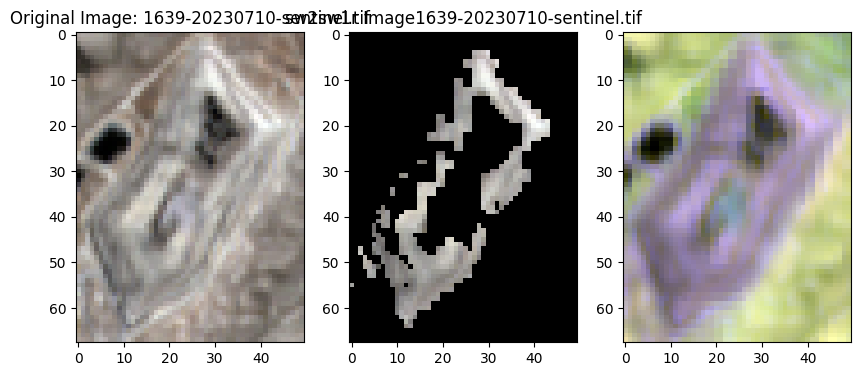

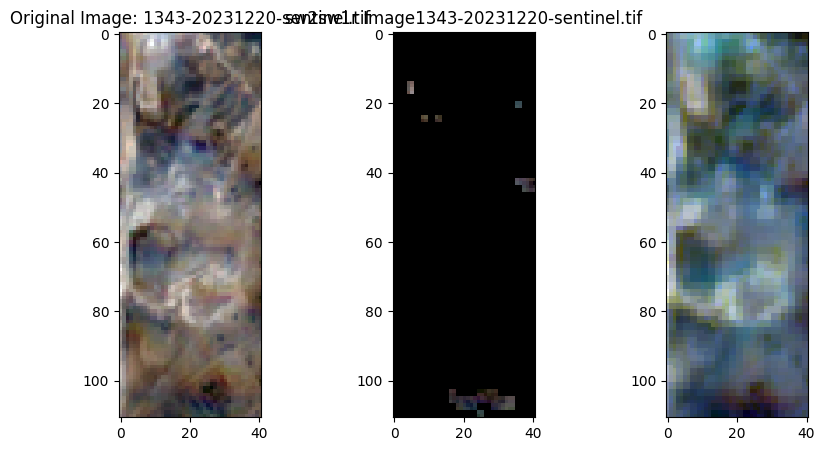

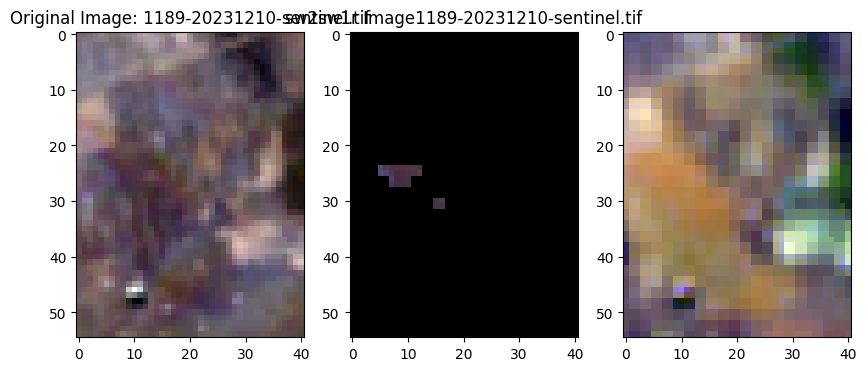

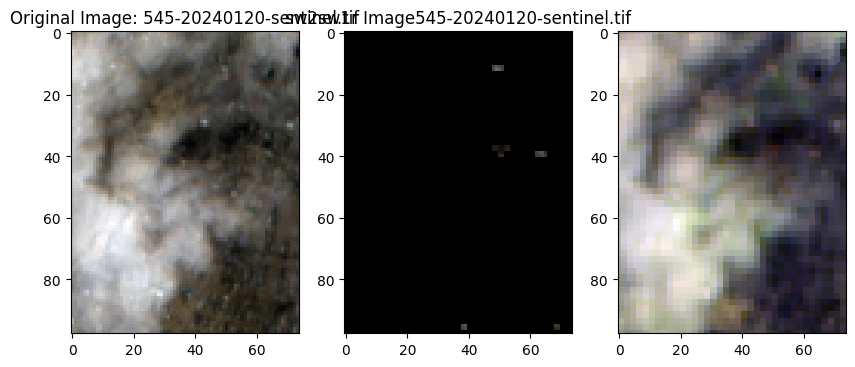

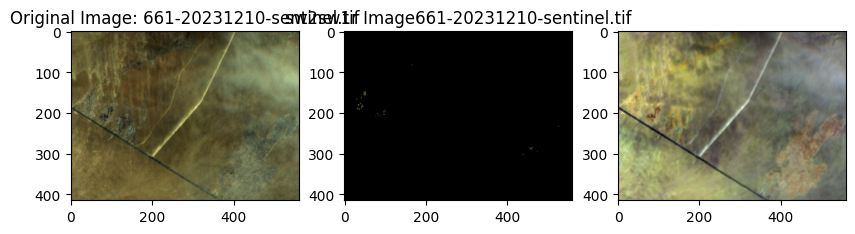

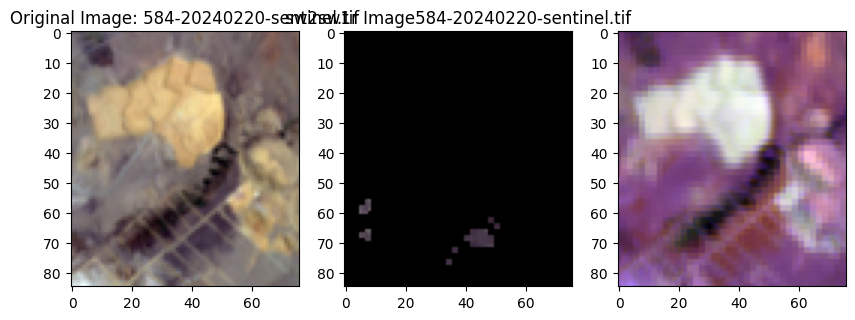

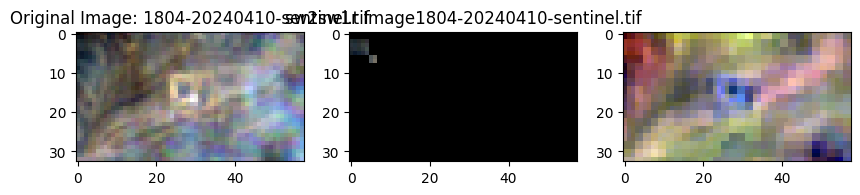

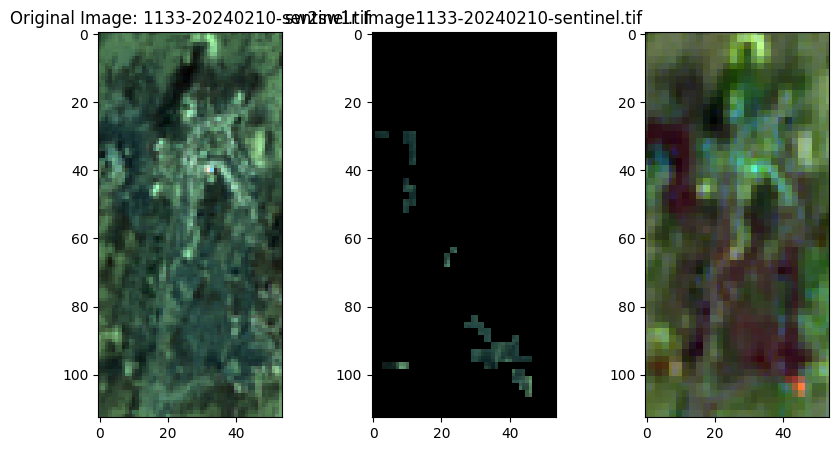

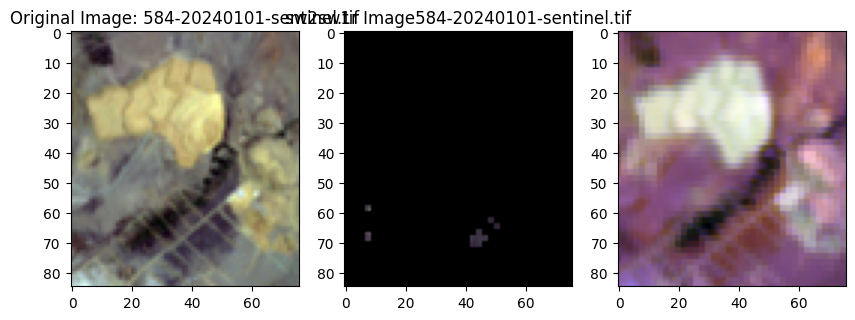

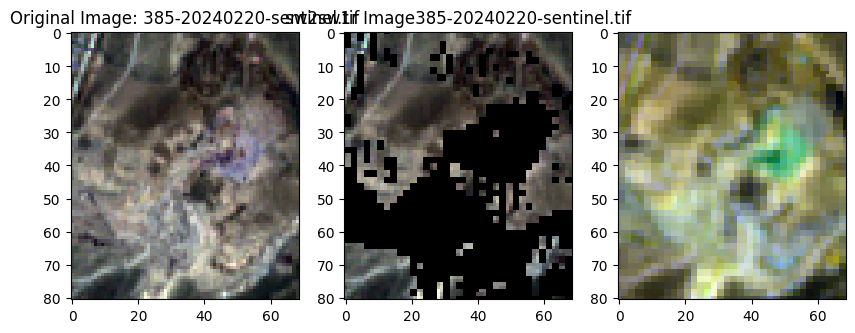

In [ ]:
# randomly choose the 10 images of the detection result 2

print("Show random sample of result2")
show_random_sample(detection_result_2)

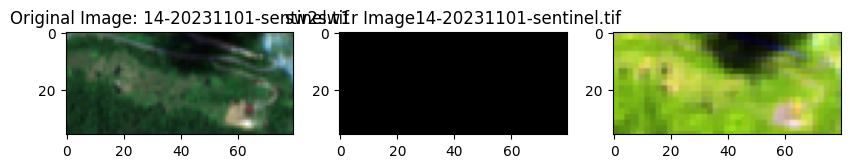

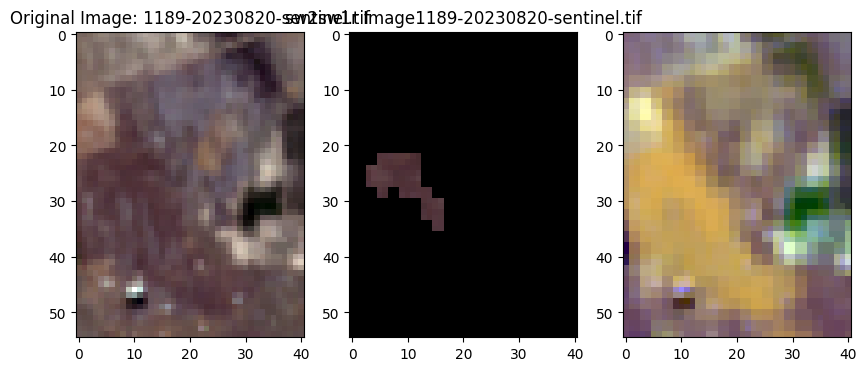

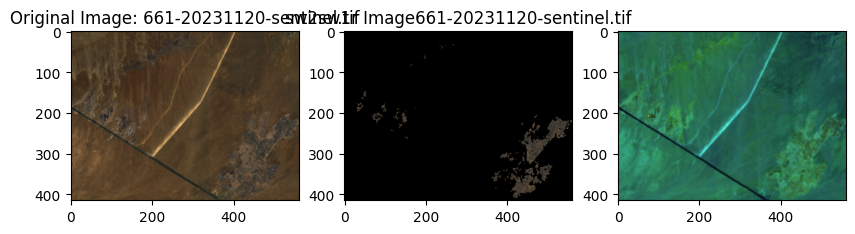

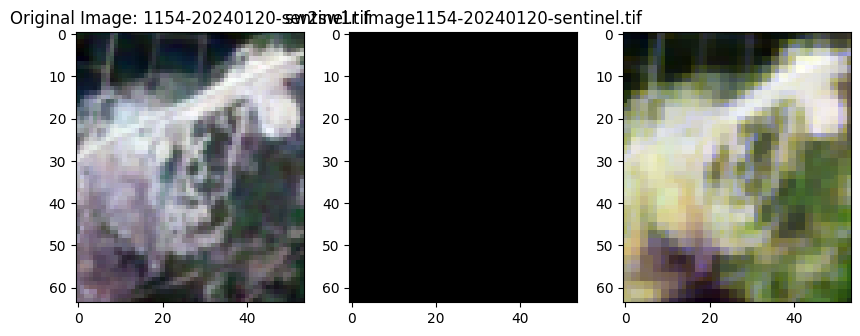

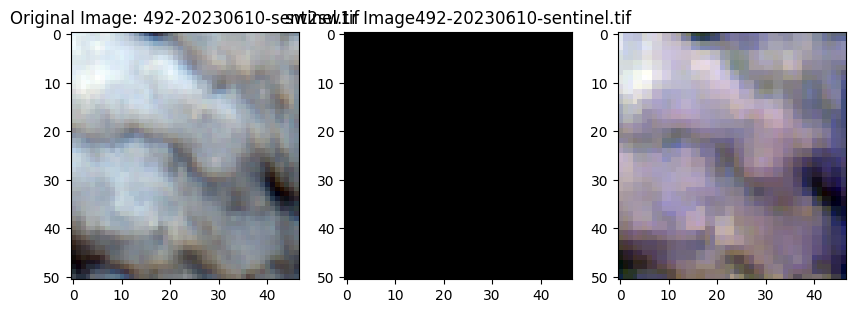

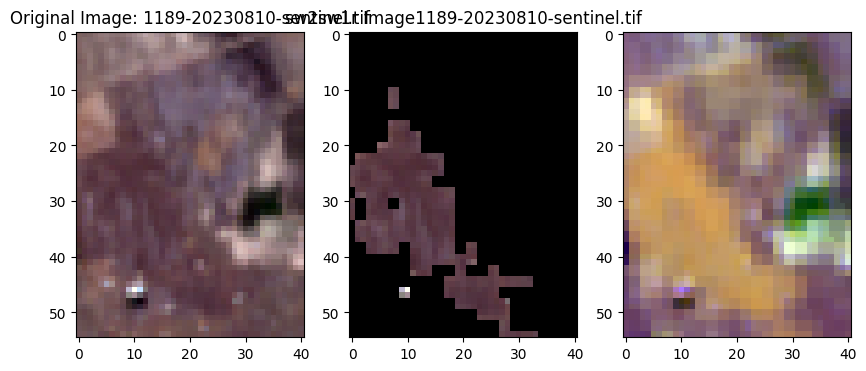

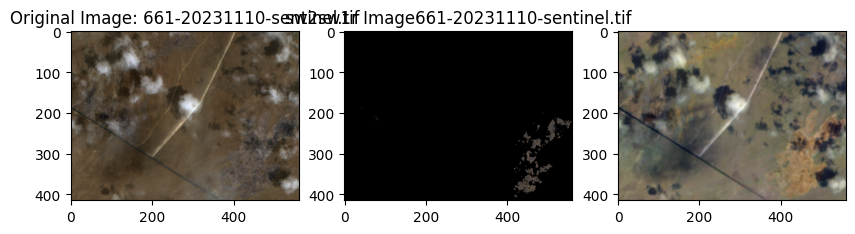

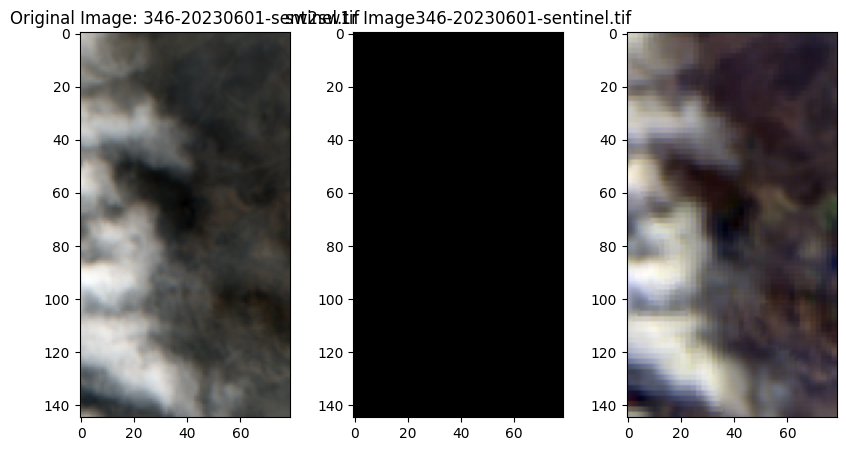

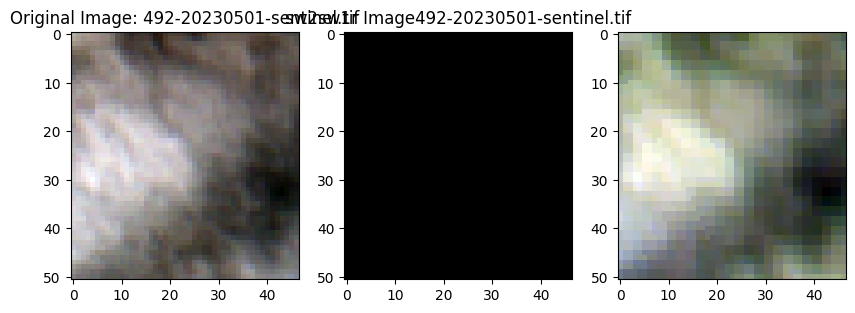

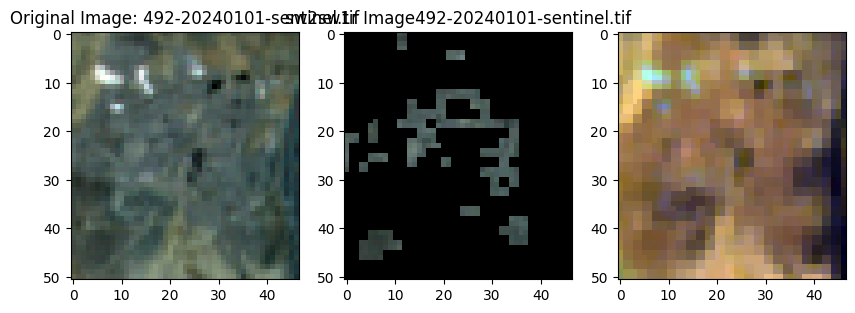

In [ ]:
# show random sample3
show_random_sample(detection_result_3)

#### 3.3.4 Save result


In [ ]:
## save the dictionary into the csv

result_path="/content/drive/My Drive/Dumpsite_Images/Detect_result"
import pandas as pd

def save_result(dictionary,csv_filename,csv_path=result_path):
    # convert the dictionary to dataframe
    df = pd.DataFrame.from_dict(dictionary, orient='index', columns=['value'])
    df.to_csv(os.path.join(csv_path,csv_filename))


In [30]:
## save the dataframe to csv
result_path="/content/drive/My Drive/Dumpsite_Images/Detect_result"
import pandas as pd

def save_result_scv(dataframe,csv_filename,csv_path=result_path):
    # convert the dictionary to dataframe
    dataframe.to_csv(os.path.join(csv_path,csv_filename))


In [ ]:
# save the result 1 to csv
save_result(detection_result_1,"result1.csv")

In [ ]:
# save the result 2 to csv
save_result(detection_result_2,"result2.csv")

In [ ]:
save_result(detection_result_3,"result3.csv")

In [6]:
save_result_scv(detection_3_df,"result3.csv")

#### 3.3.5 Load result to df

In [6]:
result_path="/content/drive/My Drive/Dumpsite_Images/Detect_result"

import pandas as pd
import os


df3=pd.read_csv(os.path.join(result_path,"result3.csv"))

# show something about df1 and df2
print(df3.head())

# Set 'Unnamed: 0' as the index
df3.set_index('Unnamed: 0', inplace=True)



   Unnamed: 0                    filename  percentage  \
0           0   662-20230810-sentinel.tif    0.000957   
1           1   661-20230810-sentinel.tif    0.000103   
2           2  1715-20230810-sentinel.tif    0.000000   
3           3   388-20230810-sentinel.tif    0.000000   
4           4  1804-20230810-sentinel.tif    0.002090   

                                            position  
0  [(57, 99), (57, 100), (58, 99), (58, 100), (83...  
1  [(2, 356), (2, 357), (3, 356), (3, 357), (4, 3...  
2                                                 []  
3                                                 []  
4               [(8, 50), (8, 51), (9, 50), (9, 51)]  


## 3.5 dNBR high confidence and low confidence


#### 3.5.1Define the dNBR function

In [28]:
# based on the detection_3_df
import rasterio
import numpy as np

image_path="/content/drive/My Drive/sentinel_tif_mean"

def calculate_dnbr_for_positions(post_tif_name, pre_tif_name, positions, tif_path=image_path):
    """
    Calculate dNBR values for specified positions in Sentinel-2 TIF images.

    Parameters:
    post_tif_name (str): File name of the post-event TIF image containing both NIR and SWIR2 bands.
    pre_tif_name (str): File name of the pre-event TIF image containing both NIR and SWIR2 bands.
    positions (list of tuples): List of (x, y) positions to calculate dNBR.
    tif_path (str): Path to the directory containing the TIF files.

    Returns:
    list of float: dNBR values for the specified positions.
    """

    def calculate_nbr(nir, swir):
        return (nir - swir) / (nir + swir)

    # Construct full paths to the TIF files
    post_tif_path = f'{tif_path}/{post_tif_name}'
    pre_tif_path = f'{tif_path}/{pre_tif_name}'

    # Read the TIF files
    if not os.path.exists(post_tif_path) or not os.path.exists(pre_tif_path):
        return []

    with rasterio.open(post_tif_path) as post_dataset, rasterio.open(pre_tif_path) as pre_dataset:
        # Assuming NIR is band 8 and SWIR2 is band 12
        post_nir_band = post_dataset.read(8)
        post_swir_band = post_dataset.read(12)
        pre_nir_band = pre_dataset.read(8)
        pre_swir_band = pre_dataset.read(12)  # some record may not have the data in this bands, so there will no nan in the bands data
        if np.isnan(post_nir_band).any() or np.isnan(post_swir_band).any() or np.isnan(pre_nir_band).any() or np.isnan(pre_swir_band).any():
            return []
        dnbr_values = []

        for pos in positions:

            x, y = pos
            # print(x,y,post_nir_band.shape[1],post_nir_band.shape[0])
            # if x < 0 or y < 0 or x >= post_nir_band.shape[1] or y >= post_nir_band.shape[0]:
            #     continue
            post_nir_value = post_nir_band[x, y]
            post_swir_value = post_swir_band[x, y]
            pre_nir_value = pre_nir_band[x, y]
            pre_swir_value = pre_swir_band[x, y]
            post_nbr = calculate_nbr(post_nir_value, post_swir_value)
            pre_nbr = calculate_nbr(pre_nir_value, pre_swir_value)
            dnbr = post_nbr - pre_nbr
            if dnbr is None:
                print(pre_nir_band)

            dnbr_values.append(dnbr)
    print(dnbr_values,positions)
    return dnbr_values




In [29]:
# iterate the record of the analysis hotspot and get the dnbr_values list to the dataframe
# read from df3
# add new colume to df3 which is the dnbr_values
import ast
for index,row in df3.iterrows():
    post_tifname=row["filename"] # name of tif
    pre_tifname=get_pre_sentinel_filename(post_tifname)
    positions=row["position"]
    positions=ast.literal_eval(positions)


    if len(positions)>0:
      dnbr_values=calculate_dnbr_for_positions(post_tifname,pre_tifname,positions) # list returned to define which is
      if len(dnbr_values)==0 or max(dnbr_values)>0.1:
          df3.loc[index,"confidence"]="high"
      else:
          df3.loc[index,"confidence"]="low"

print(df3.head())


[-0.14971003452936005, -0.4130224987756748, -0.2522883200427948, -0.2965494905830055, -0.18145071535433385, -0.35736207200272196, -0.2097366109536977, -0.4693881632897974, -0.2692714709005094, -0.48886877001892975, -0.4415912003130953, -0.3980835790581867] [(57, 99), (57, 100), (58, 99), (58, 100), (83, 81), (83, 82), (84, 81), (84, 82), (112, 67), (112, 68), (113, 67), (113, 68)]
[-0.2414456293865646, -0.22148530792316637, -0.24078519983053243, -0.2281090041350165, -0.2538123167155425, -0.2567666960870844, -0.2530589965515499, -0.23802367279609973, -0.2583105614558977, -0.26022714605962277, -0.25550502605088277, -0.22518091162226933, -0.27467647121757793, -0.26350445071758377, -0.2645912409313144, -0.2502715128856407, -0.2628946616555155, -0.26252924722035204, -0.2547117152631894, -0.2546911237613325, -0.25688809141869257, -0.2587472839798691, -0.24319781429709283, -0.24742864721327504] [(2, 356), (2, 357), (3, 356), (3, 357), (4, 352), (4, 353), (4, 354), (4, 355), (5, 352), (5, 353)

In [31]:
# save the new df to scv
save_result_scv(df3,"result3_with_confidence.csv")

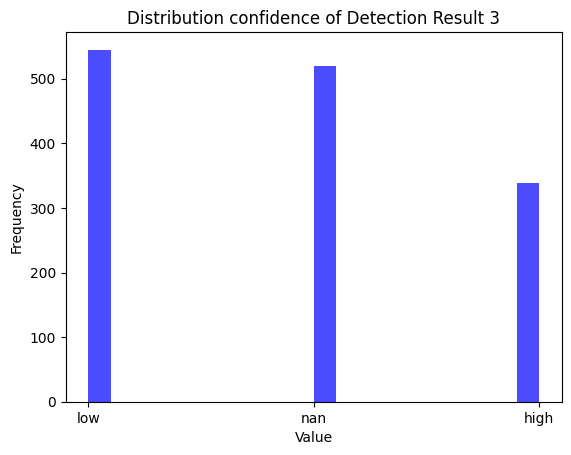

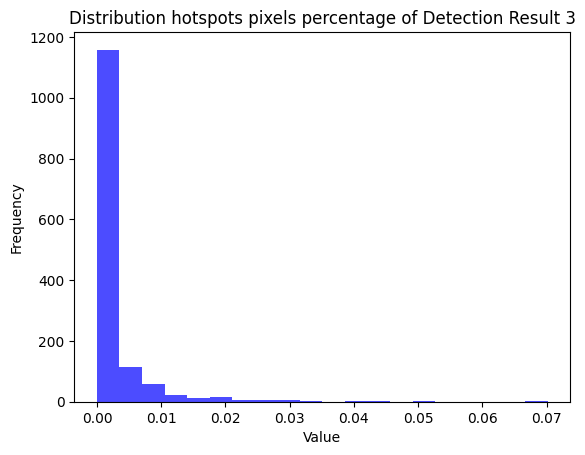

339
545
        percentage
count  1404.000000
mean      0.002430
std       0.005407
min       0.000000
25%       0.000000
50%       0.000616
75%       0.002186
max       0.070186


In [51]:
# check the distribution df3["confidence"] , df3["percentage"], plot the values's distribution
import matplotlib.pyplot as plt

# Convert the 'confidence' column to strings
df3['confidence'] = df3['confidence'].astype(str)

plt.hist(df3["confidence"], bins=20, alpha=0.7, color='blue')
plt.title('Distribution confidence of Detection Result 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(df3["percentage"], bins=20, alpha=0.7, color='blue')
plt.title('Distribution hotspots pixels percentage of Detection Result 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# get the count of the high confidence and low confidence
print(len(df3[df3["confidence"]=="high"]))
print(len(df3[df3["confidence"]=="low"]))
print(df3.describe())

#### 3.5.2 Export the sheet

In [ ]:
# prepare detection result
# for new csv , filename(sentinel2), index , time , dumpsite name , HPP(hotspots pixels percentage), confidence ,size


### Old version Differ the high confidence and low confidence

Using compared NBR

In [ ]:

# anaylsis the result with nbr and determin high or low confidence
import time
start_time=time.time()

tifile_path="/content/drive/My Drive/sentinel_tif_mean/"

def get_nbr(filename,file_path=tifile_path):
    with rasterio.open(os.path.join(file_path, filename)) as src:
        data = src.read()
        swir1=data[10]
        swir2=data[11]
        nir=data[7]
        red=data[3]
        nbr=(nir-swir2)/(nir+swir2)
        return nbr

# get the confidence of each tif file, return it is confidence or not
def compared_dnbr(filename,file_path=tifile_path):
    post_tif_filename=filename
    pre_tif_filename=get_pre_sentinel_filename(filename)
    if is_file_in_folder(pre_tif_filename,file_path)==False:
        return -1;
    else:
        post_nbr=get_nbr(post_tif_filename,file_path=tifile_path)
        pre_nbr=get_nbr(pre_tif_filename,file_path)
        dnbr=pre_nbr-post_nbr
        return dnbr

# define a function to check is the file exist
def is_file_in_folder(filename, folder_path):
    return os.path.exists(os.path.join(folder_path, filename))


In [ ]:
## get the result dictionary from csv
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(result_dict3)

# get the a file name randomly from the path and check the range of the dnbr
tifile_path="/content/drive/My Drive/sentinel_tif_mean/"

randomly_file_name=random.choice(list(result_dict3.keys()))
print(randomly_file_name)
randomly_dnbr=compared_dnbr(randomly_file_name)
# print the max and min of the dnbr



#### 3.5.1 Show High confidence


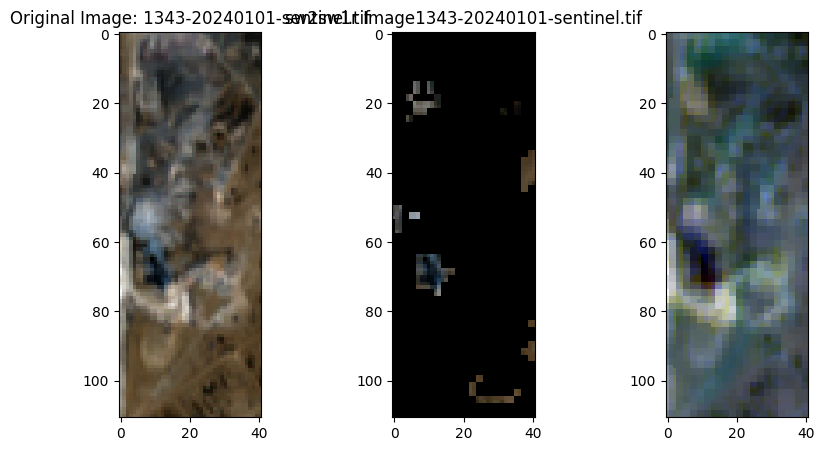

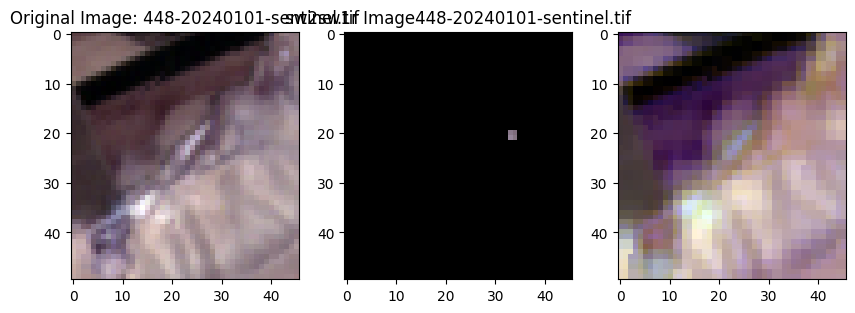

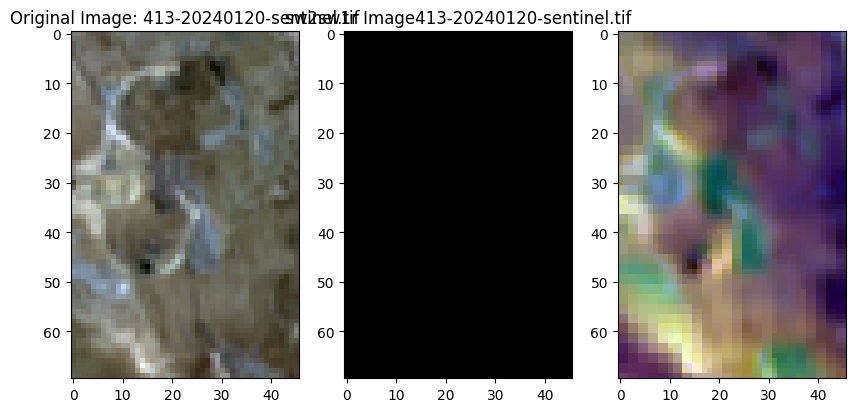

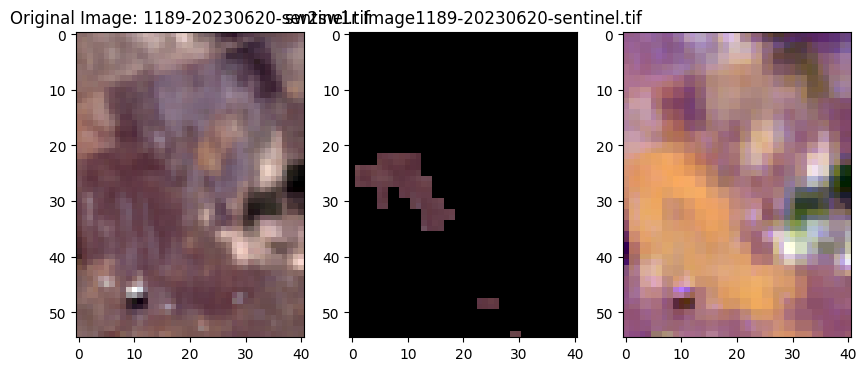

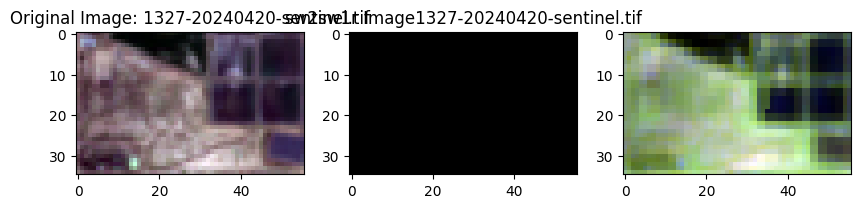

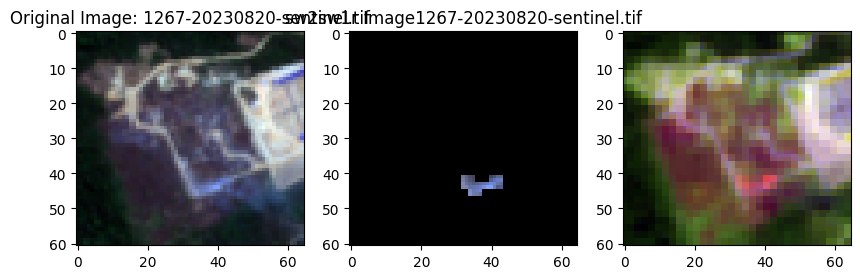

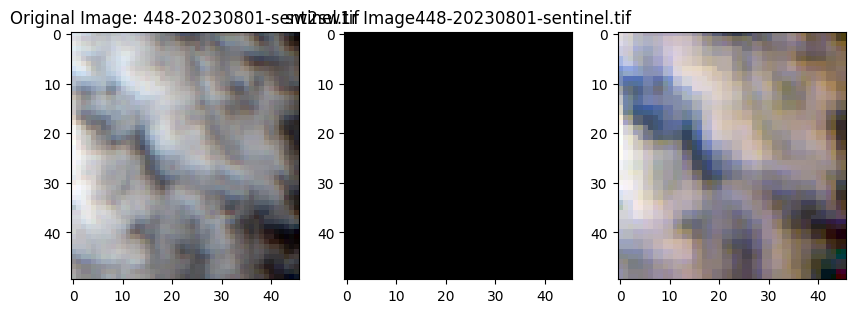

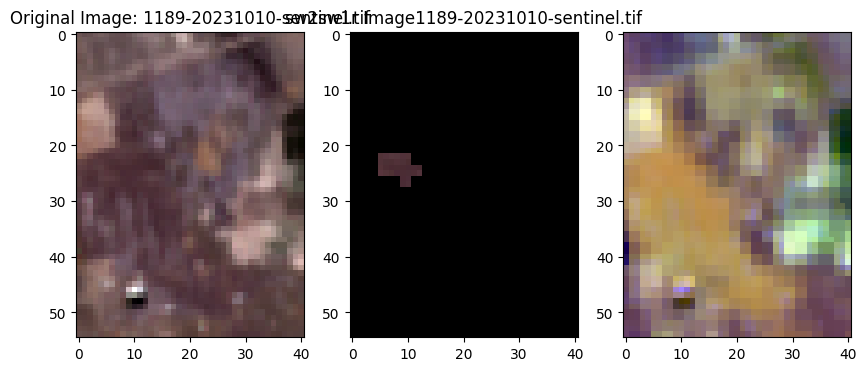

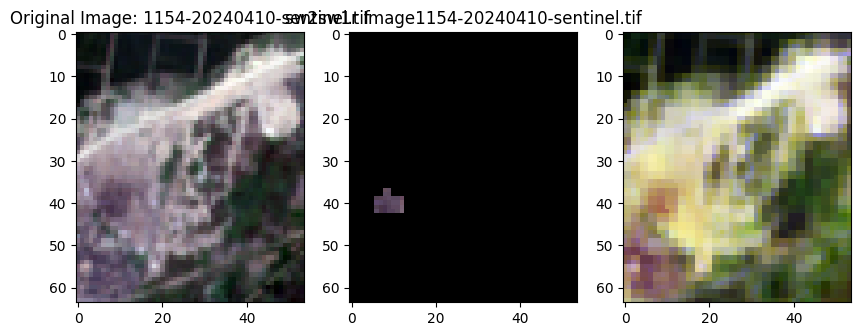

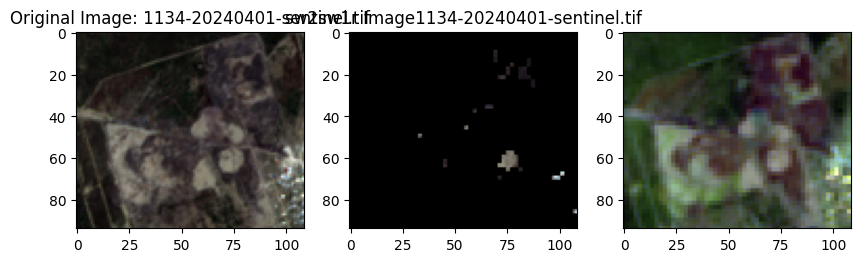

In [ ]:
# show the 10 randomly from high confidence
high_confidence_result=list(filter(lambda x:confidence_3[x]>0,confidence_3))

import random
for i in random.sample(high_confidence_result,10):
    # get the key of the

    with rasterio.open(os.path.join(tifile_path, i)) as src:
        data = src.read()
        swir1=data[10]
        swir2=data[11]
        red=data[3]
        nir=data[7]
        green=data[2]
        blue=data[1]

        show_images_non_normal(i,red,green,blue,swir2,swir1,nir)

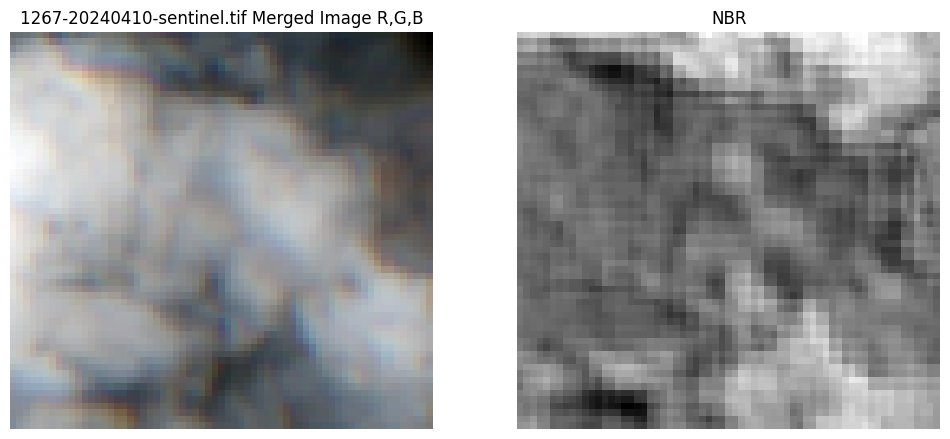

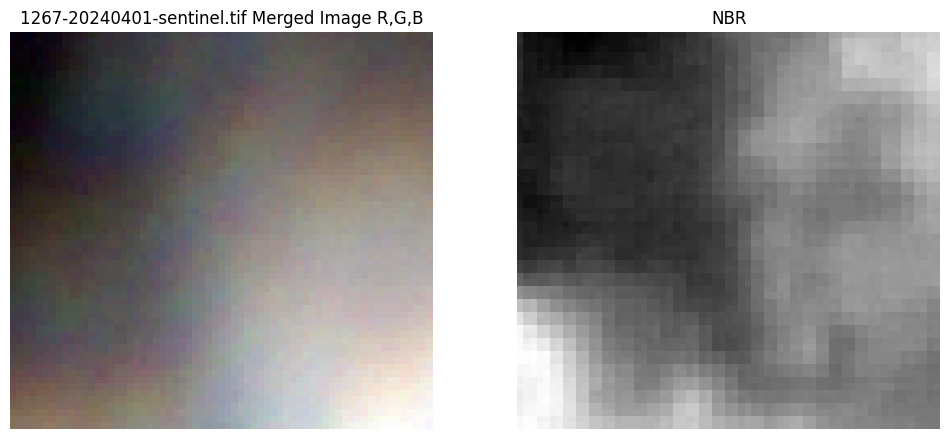

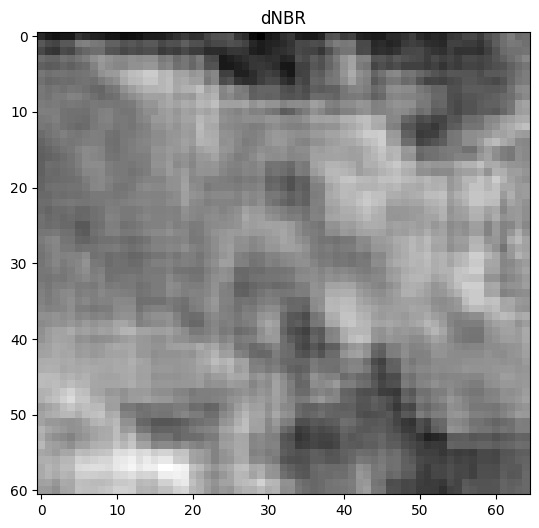

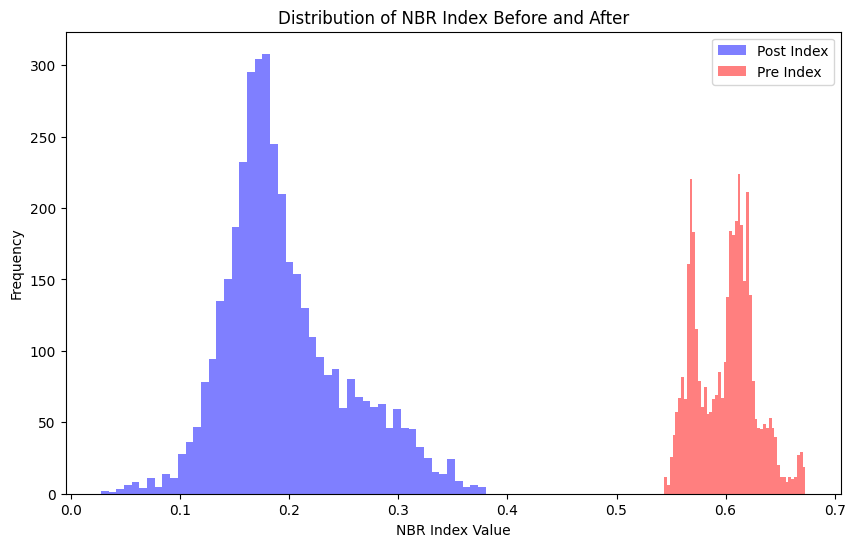

0.404721027099064


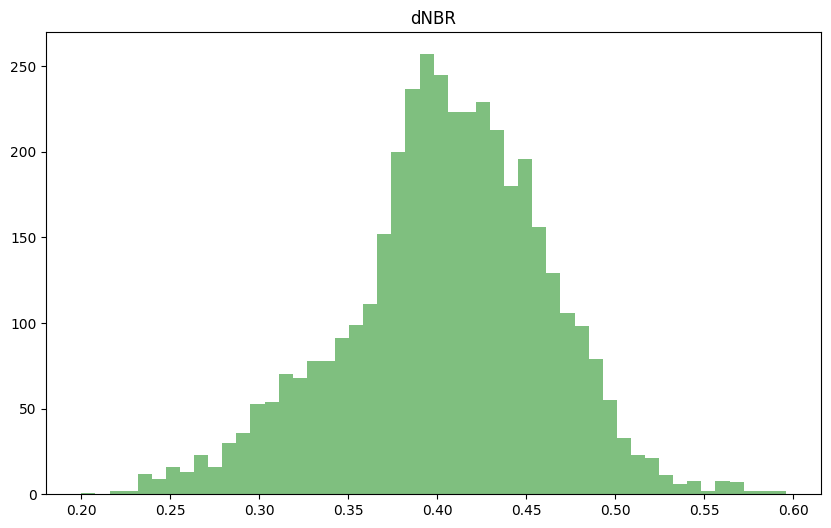

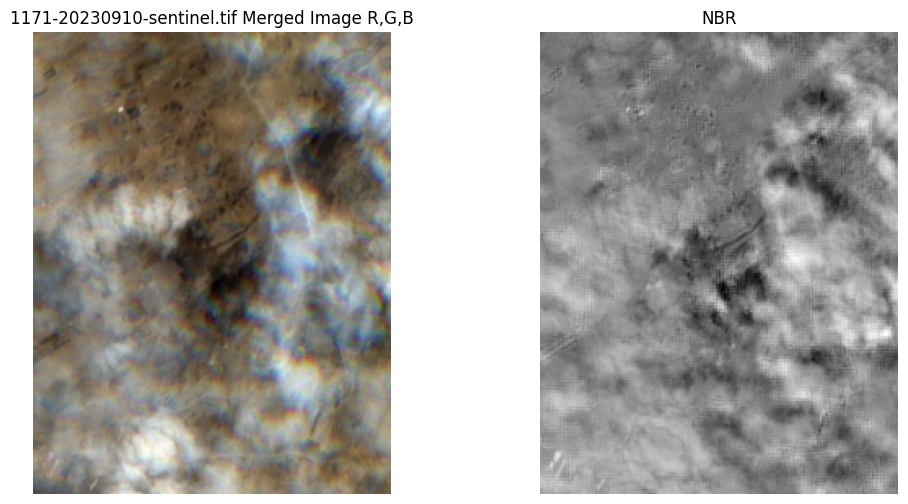

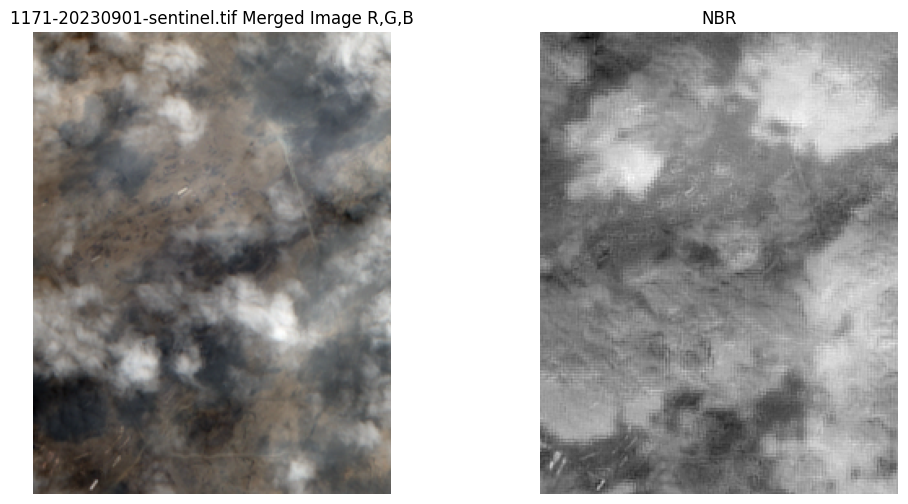

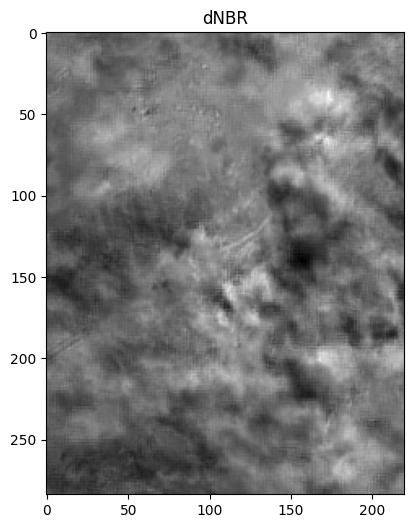

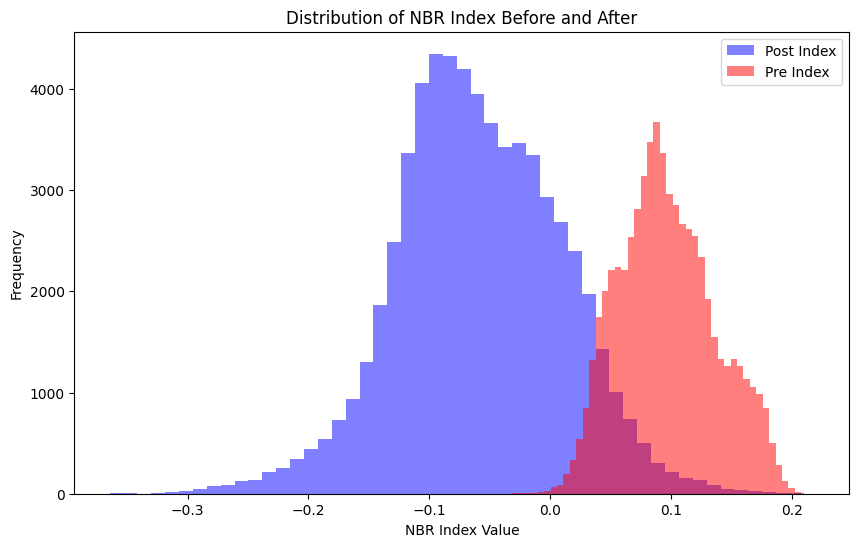

0.15599825054099234


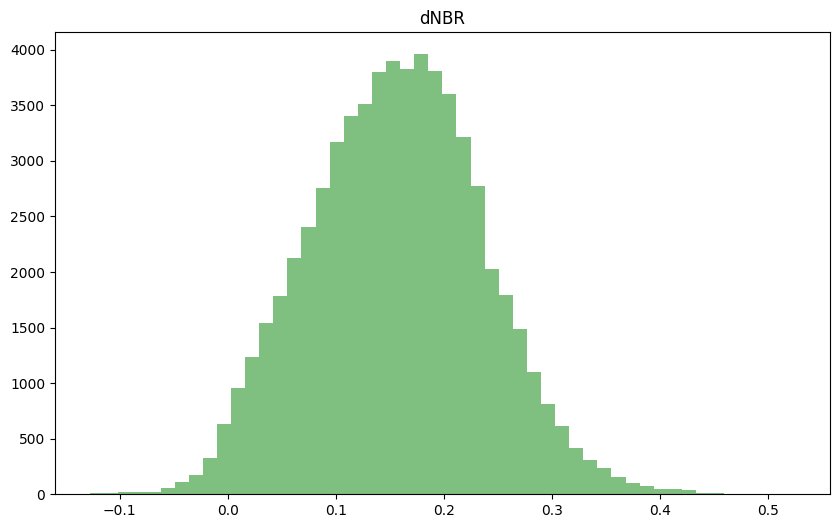

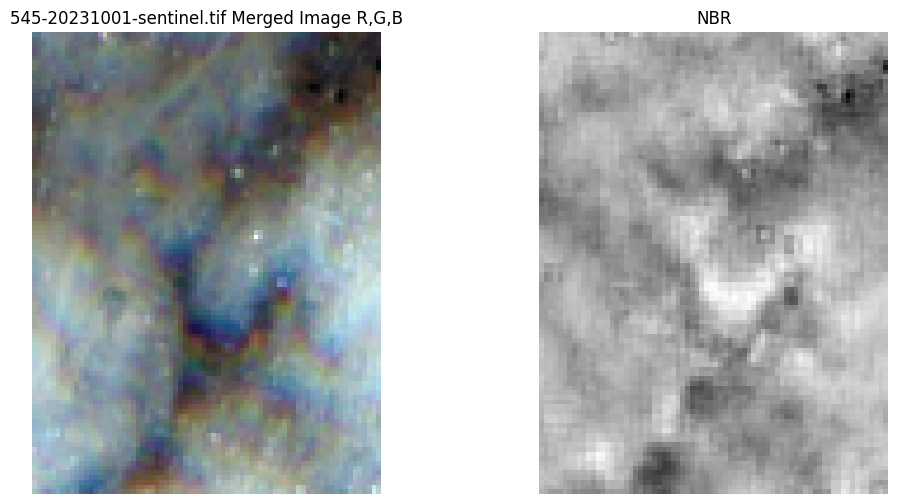

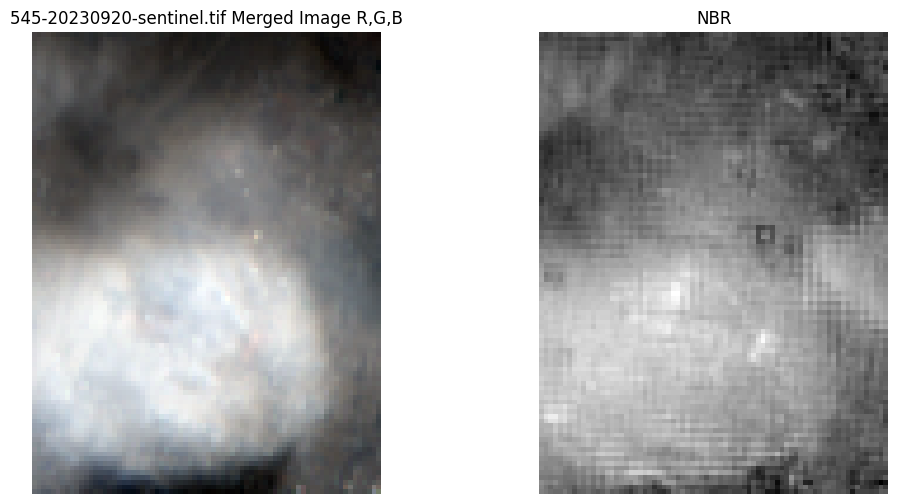

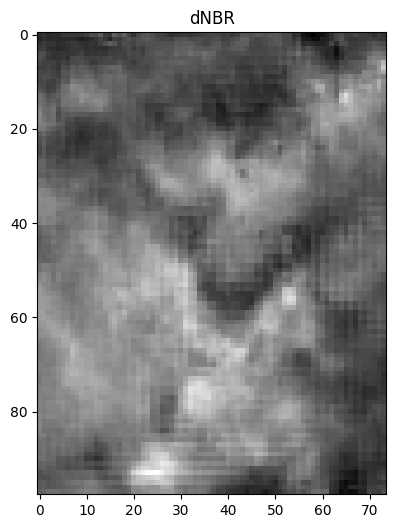

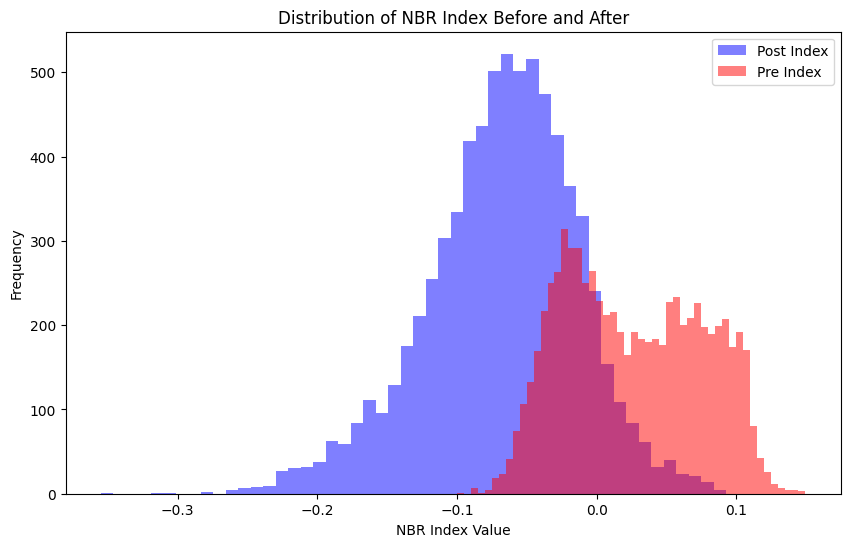

0.0931007577492949


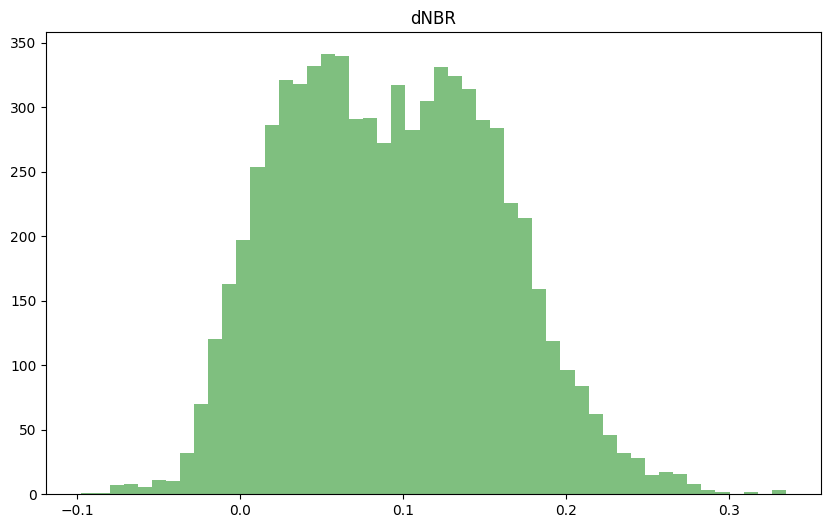

In [ ]:
# ramdomly show the nbr comparision
import random
high_confidence_result3=list(filter(lambda x:confidence_3[x]>0.05,confidence_3))
for i in random.sample(high_confidence_result3,3):
    show_nbr_comparation(i)


In [ ]:
### save the result in the csv both the detection  and confidence
# csv file , index,times， detection result, high or low confidence .name ,size，
import pandas as pd



def save_result2_to_csv(result_kv , high_confidence, ):

# Export the sheet
## Save the result to table
- index, time, name , value

In [48]:
# save the result to CVS
import pandas as pd
# result_kv : k,v  , k: filename,v:percentage
cvs_path="/content/drive/My Drive/Dumpsite_Images/FireBurn_detection_result"
allDump_csv="/content/drive/My Drive/Dumpsite_Images/shapefile_data.csv" # all the shape file's information
from datetime import datetime, timedelta



# add index to df3
df3["index"]=df3['filename'].str.split('-').str[0]
df3["time"]=df3['filename'].str.split('-').str[1]

print(df3.head() )
result_df=df3 # using the df to export final
# define a method using for saving the resul to cvs. in the cvs_path
def save_result_to_csv(df=result_df , cvs_path=cvs_path, cvs_name="default_result.csv" , tag="default", dumpsite_csv=allDump_csv):

    # df: filename, percentage, confidence,
    # filename : index-time-sentinel.tif . get the index to mach the


    # get the dumpsite's name save to the df
    name_df = pd.read_csv(dumpsite_csv)
    # Ensure the 'index' field in name_df is a string to match the type in df

    name_df['Index'] = name_df['Index'].astype(str)
    name_df.rename(columns={'Index': 'index', 'DEN_BOT': 'name'}, inplace=True)


    # Merge the two DataFrames on the 'index' field
    df = df.merge(name_df[['index', 'name', 'AREA_HA']], on='index', how='left')

    print(df.head())


    # filer the percentage > 0
    df=df[df["percentage"]>0]
    # drop the position field from the df
    df.drop(columns=["position"],inplace=True)



    print(df.head())
    print(df.describe())

    # Save the DataFrame to a CSV file
    df.to_csv(os.path.join(cvs_path,cvs_name), index=False)


                              filename  percentage  \
Unnamed: 0                                           
0            662-20230810-sentinel.tif    0.000957   
1            661-20230810-sentinel.tif    0.000103   
2           1715-20230810-sentinel.tif    0.000000   
3            388-20230810-sentinel.tif    0.000000   
4           1804-20230810-sentinel.tif    0.002090   

                                                     position confidence  \
Unnamed: 0                                                                 
0           [(57, 99), (57, 100), (58, 99), (58, 100), (83...        low   
1           [(2, 356), (2, 357), (3, 356), (3, 357), (4, 3...        low   
2                                                          []        nan   
3                                                          []        nan   
4                        [(8, 50), (8, 51), (9, 50), (9, 51)]       high   

           index      time  
Unnamed: 0                  
0            662  20230810  
1

In [49]:
save_result_to_csv(cvs_name="detect_result20240625.csv")

                     filename  percentage  \
0   662-20230810-sentinel.tif    0.000957   
1   661-20230810-sentinel.tif    0.000103   
2  1715-20230810-sentinel.tif    0.000000   
3   388-20230810-sentinel.tif    0.000000   
4  1804-20230810-sentinel.tif    0.002090   

                                            position confidence index  \
0  [(57, 99), (57, 100), (58, 99), (58, 100), (83...        low   662   
1  [(2, 356), (2, 357), (3, 356), (3, 357), (4, 3...        low   661   
2                                                 []        nan  1715   
3                                                 []        nan   388   
4               [(8, 50), (8, 51), (9, 50), (9, 51)]       high  1804   

       time                                   name     AREA_HA  
0  20230810       Botadero Municipal de Lambayeque   17.352827  
1  20230810               Botadero Pampas de Reque  307.009856  
2  20230810       Botadero de San Antonio - Cañete   47.390000  
3  20230810              Botad

# Active fire detection from NASA

https://firms.modaps.eosdis.nasa.gov/active_fire/

4 datasource
MODIS 1km

In [ ]:
# four path of the datasource, shapefile
# from 20230101-20240613
j1v_path= "/content/drive/My Drive/Dumpsite_Images/nasa_firms/DL_FIRE_J1V-C2_479776"
j2v_path= "/content/drive/My Drive/Dumpsite_Images/nasa_firms/DL_FIRE_J2V-C2_479777"
modis_path= "/content/drive/My Drive/Dumpsite_Images/nasa_firms/DL_FIRE_M-C61_479774"
sv_c2= "/content/drive/My Drive/Dumpsite_Images/nasa_firms/DL_FIRE_SV-C2_479778"

In [ ]:
# load the dumpsite's
# Trigger the authentication flow.
import ee
import time

ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-qinheyi')
print("Current Time:",time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))


In [ ]:
import os
from collections import defaultdict

# Define the directory containing the files
directory = "/content/drive/My Drive/sentinel_tif_mean"

# List all files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.tif')]

# Dictionary to hold files by index
index_dict = {}

# Extract index from filename and group files by index
for file in files:
    index = file.split('-')[0]

    index_dict[index]=file

print(len(index_dict))
# Find files with unique indices

files_name_list=index_dict.values()

39


In [ ]:
# load the csv from the nasa.gov
sample_file_name = "SUOMI_VIIRS_C2_South_America_24h.csv"
path= "/content/drive/My Drive/Dumpsite_Images/"
tif_path= "/content/drive/My Drive/sentinel_tif_mean"

# only get the unique index from the tif_path
# from the folder to get the tif files which have different index in the file name (index_time)


import pandas as pd
df = pd.read_csv(os.path.join(path,sample_file_name))
df.head()

# merge the path to the files_name to create list name files_list
files_list=[]
for name in files_name_list:
    files_list.append(f"{tif_path}/{name}")



In [ ]:
# check the latitude and longitude in the tif's range or not

def is_point_in_bbox(lat, lon, bbox):
    """
    Check if a given latitude and longitude are within the bounding box.

    Parameters:
    lat (float): Latitude of the point
    lon (float): Longitude of the point
    bbox (rasterio.coords.BoundingBox): Bounding box of the GeoTIFF

    Returns:
    bool: True if the point is within the bounding box, False otherwise
    """
    return bbox.bottom <= lat <= bbox.top and bbox.left <= lon <= bbox.right



for filename in files_list:
  if filename.endswith('.tif'):
    with rasterio.open(os.path.join(tif_path, filename)) as src:
      bbox = src.bounds
      # the result directly saveinto the df["iswithin"]
      for index, row in df.iterrows():
        df.loc[index, "iswithin"] = is_point_in_bbox(row["latitude"], row["longitude"], bbox)

# show the distribution of the df["iswithin"]
df["iswithin"].value_counts()



iswithin
False    5532
Name: count, dtype: int64